In [1]:
# Imports
import os
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

## Get SDSS DR7 QSO Summary data

The data is located at https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html 

In [4]:
import os
path = os.getcwd()
# Get the quasar catalog - it gets saved in the same directory as the notebook 
url = "https://faculty.washington.edu/ivezic/macleod/qso_dr7/DB_QSO_S82.dat.gz"
os.system(f'wget {url}')   

In [3]:
import os
from astropy.table import Table
path = os.getcwd()
file_path = os.path.join(path, "DB_QSO_S82.dat.gz")
# we know the column meaning from 
# https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_DB.html
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
SDSS_DB_QSO = Table.read(file_path, format='ascii', names = colnames)

In [4]:
SDSS_DB_QSO[:5]

dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
70,2.169302,1.238649,301,-23.901,-24.181,1.073,0.0,0.0,20.793,20.469,20.197,20.04,20.0,0.116
98,1.091028,0.962126,144,-23.399,-23.576,0.7867,0.0,0.0,20.79,20.183,19.849,19.818,19.43,0.183
233,0.331289,0.17723,58,-24.735,-25.058,1.6199,0.0,0.0,20.892,20.554,20.431,20.199,20.099,0.154
1018,1.364696,-0.098956,190,-23.121,-24.045,0.6125,0.0,45.433,20.098,19.722,19.784,19.485,19.541,0.178
1310,0.221552,-0.292485,36,-26.451,-26.974,2.7563,9.361,46.76,20.707,19.663,19.61,19.705,19.529,0.174


## Get SDSS DR7 QSO Light Curve data

The data is located at https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html 


In [ ]:
url = "https://faculty.washington.edu/ivezic/macleod/qso_dr7/QSO_S82.tar.gz"
os.system(f'wget {url}')  

Unpack the light curves...https://www.geeksforgeeks.org/tar-command-linux-examples/

In [ ]:
! tar xvzf QSO_S82.tar.gz

Confirm that all the light curves are there ...

In [5]:
len(os.listdir("QSO_S82"))

9258

In [7]:
#os.listdir("QSO_S82")

## Get the PS1 QSO data 

All the code needed to execute the SQL query is in https://github.com/suberlak/PS1_SDSS_CRTS/blob/master/code2/Get_PS1_DR2_Quasar_data.ipynb 
    
However, instead of obtaining data for all 9258 objects, it suffices to get the data only for the CLQSO candidates from the paper.
    
The table of candidates can be downloaded from https://iopscience.iop.org/0004-637X/907/2/96/suppdata/apjabc698t5_ascii.txt?doi=10.3847/1538-4357/abc698. I copy-paste the text into a text file that I attach in the e-mail as "CLQSO_candidates.txt"

In [8]:
colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
            'f_Edd','Delta(mag)',
            'Delta(sigma_G)', 'MedianPS1']
clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                   names=colnames)

In [9]:
clqso[:5]

dbID,SDSSJID,ra,dec,Redshift,log10_Lbol,log10_MBH,f_Edd,Delta(mag),Delta(sigma_G),MedianPS1
str9,str18,float64,float64,float64,float64,str4,str5,float64,float64,float64
123909,001626.54+003632.4,4.111,0.609,3.24,46.57,9.47,-1.0,-0.29,-0.054,20.48
8442,001731.70+004910.1,4.382,0.819,2.43,46.61,9.09,-0.58,-0.36,-0.107,20.36
4069419,003359.39+000230.0,8.497,0.042,1.64,45.95,9.05,-1.21,0.22,0.017,20.2
221006,005142.20+002129.0,12.926,0.358,1.55,45.95,8.24,-0.39,0.21,-0.01,19.97
257776,005513.15-005621.2,13.805,-0.939,3.61,47.13,9.58,-0.54,-0.32,-0.242,19.53


Besides, it turns out there's now an improved interface to PS1 DR2: https://catalogs.mast.stsci.edu/panstarrs/

All one needs to do is to usse the "Crossmatch a List of Targets " option, uploading a csv file with columns "target ra dec"(where "target") is any object name we choose for convenience).

So lets make one:

In [10]:
clqso[['dbID','ra','dec']].write('CLQSO_candidates_ra_dec.tbl', format='ipac',
                                names=('target','ra','dec'),
                                overwrite=True)

In [42]:
clqso[['dbID','ra','dec']].write('CLQSO_candidates_ra_dec.csv', format='csv',
                                names=('target','ra','dec'),
                                overwrite=True)

"Forced mean object", and "Detections" are two tables worth checking. 

I get 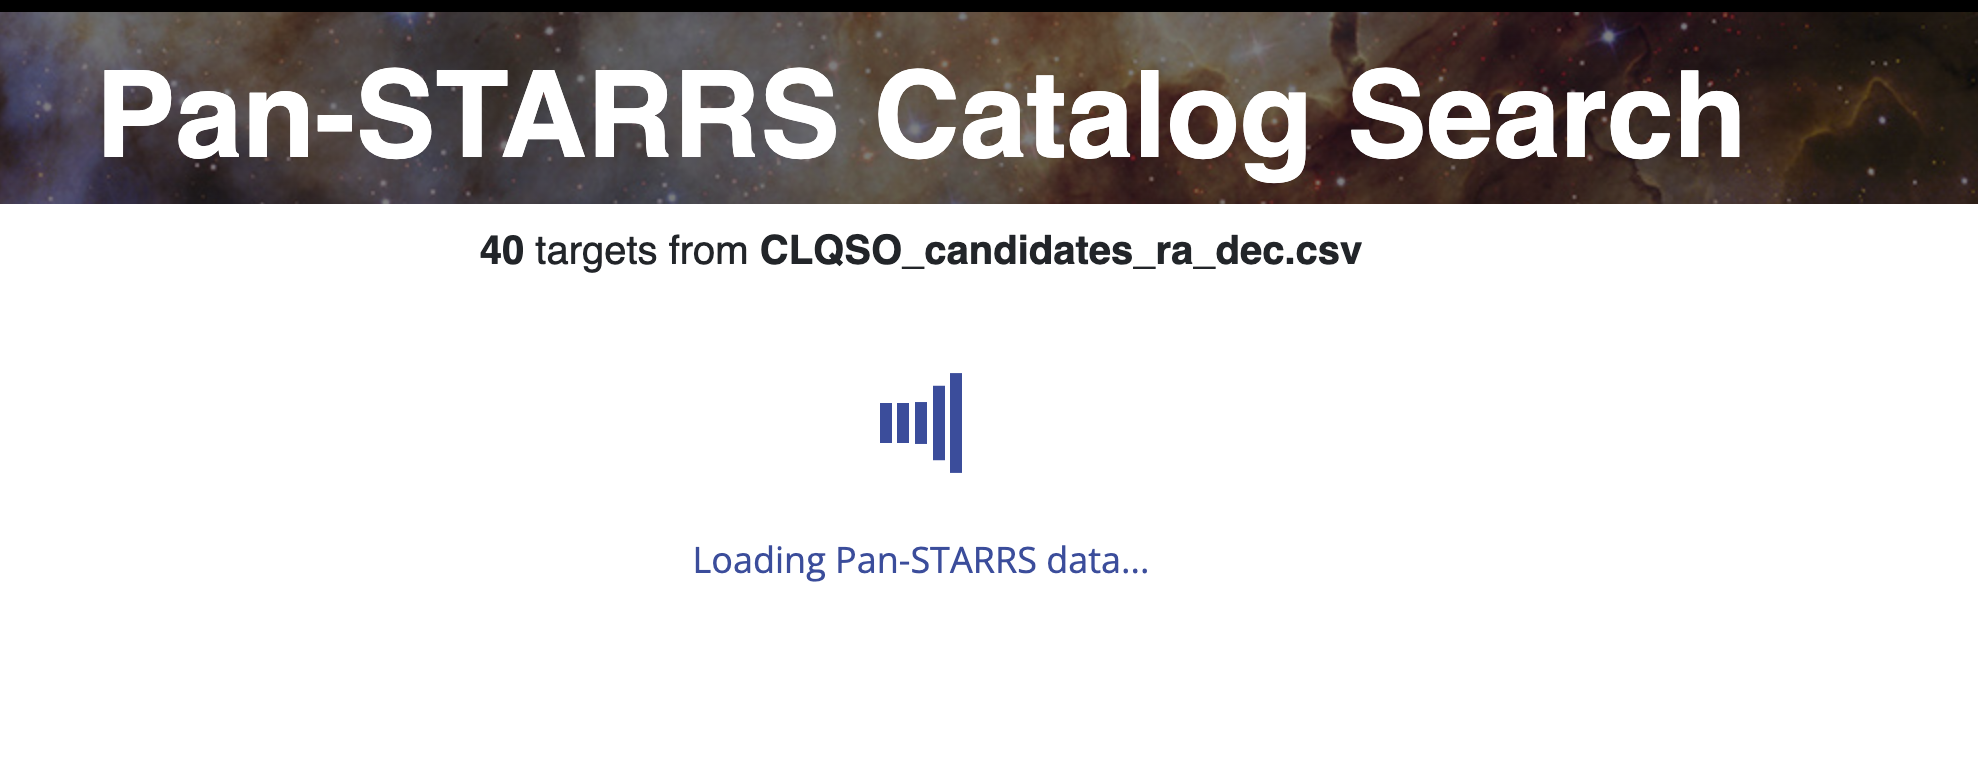

I save the table as CSV file `CLQSO_candidates_PS1_DR2.csv`:

In [23]:
import os

ps1 = Table.read('CLQSO_candidates_PS1_DR2.csv', format='csv')

In [62]:
ps1[:3]

_ra_,_dec_,_searchID_,MatchID,MatchRA,MatchDEC,dstArcSec,objName,objAltName1,objAltName2,objAltName3,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,tessID,projectionID,skyCellID,randomID,batchID,dvoRegionID,processingVersion,objInfoFlag,qualityFlag,raStack,decStack,raStackErr,decStackErr,raMeanErr,decMeanErr,epochMean,posMeanChisq,cx,cy,cz,lambda,beta,l,b,nStackObjectRows,nStackDetections,nDetections,ng,nr,ni,nz,ny,gQfPerfect,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagStd,gMeanPSFMagNpt,gMeanPSFMagMin,gMeanPSFMagMax,gMeanKronMag,gMeanKronMagErr,gMeanKronMagStd,gMeanKronMagNpt,gMeanApMag,gMeanApMagErr,gMeanApMagStd,gMeanApMagNpt,gFlags,rQfPerfect,rMeanPSFMag,rMeanPSFMagErr,rMeanPSFMagStd,rMeanPSFMagNpt,rMeanPSFMagMin,rMeanPSFMagMax,rMeanKronMag,rMeanKronMagErr,rMeanKronMagStd,rMeanKronMagNpt,rMeanApMag,rMeanApMagErr,rMeanApMagStd,rMeanApMagNpt,rFlags,iQfPerfect,iMeanPSFMag,iMeanPSFMagErr,iMeanPSFMagStd,iMeanPSFMagNpt,iMeanPSFMagMin,iMeanPSFMagMax,iMeanKronMag,iMeanKronMagErr,iMeanKronMagStd,iMeanKronMagNpt,iMeanApMag,iMeanApMagErr,iMeanApMagStd,iMeanApMagNpt,iFlags,zQfPerfect,zMeanPSFMag,zMeanPSFMagErr,zMeanPSFMagStd,zMeanPSFMagNpt,zMeanPSFMagMin,zMeanPSFMagMax,zMeanKronMag,zMeanKronMagErr,zMeanKronMagStd,zMeanKronMagNpt,zMeanApMag,zMeanApMagErr,zMeanApMagStd,zMeanApMagNpt,zFlags,yQfPerfect,yMeanPSFMag,yMeanPSFMagErr,yMeanPSFMagStd,yMeanPSFMagNpt,yMeanPSFMagMin,yMeanPSFMagMax,yMeanKronMag,yMeanKronMagErr,yMeanKronMagStd,yMeanKronMagNpt,yMeanApMag,yMeanApMagErr,yMeanApMagStd,yMeanApMagNpt,yFlags,uniquePspsP2id,detectID,filterID,imageID,randomDetID,obsTime,xPos,yPos,xPosErr,yPosErr,pltScale,posAngle,ra,dec,raErr,decErr,extNSigma,zp,telluricExt,expTime,airMass,psfFlux,psfFluxErr,psfMajorFWHM,psfMinorFWHM,psfTheta,psfCore,psfQf,psfQfPerfect,psfChiSq,psfLikelihood,momentXX,momentXY,momentYY,momentR1,momentRH,momentM3C,momentM3S,momentM4C,momentM4S,apFlux,apFluxErr,apFillF,apRadius,kronFlux,kronFluxErr,kronRad,sky,skyErr,infoFlag,infoFlag2,infoFlag3,mag,magerr
float64,float64,int64,int64,float64,float64,float64,str21,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64
17.05,-0.088,5,107890170499734957,17.05000551,-0.0879278,0.25856791058118606,PSO J017.0500-00.0879,-999,-999,-999,3492271000046739,362971981198995,0,8831540672094,10789,1,1236,92,0.860817087684588,3492271,84511,3,436527256,52,17.0499639,-0.087881,0.0010000000474974513,0.0010000000474974513,0.009990000165998936,0.010300000198185444,56098.67769676,0.8784999847412109,0.9560480954304549,0.2932058732999675,-0.0015346290116704962,15.681541285922487,-6.778917690952037,132.0874168627157,-62.661330414097314,-999,5,69,14,13,20,13,9,0.9993240237236023,20.83329963684082,0.049421001225709915,0.25181299448013306,11,20.702899932861328,21.382999420166016,20.941699981689453,0.06

Show which filters are available:

In [26]:
import numpy as np
np.unique(ps1['filterID'])

1
2
3
4
5


Here '12345' stands for `grizy` for PS1.  So to see only `r`-band data we select `filterId`=`2`:

In [39]:
idCols = [name  for name in ps1.colnames  if 'ID' in name]

Unfortunately the `searchString` somehow didn't get saved in the downloaded CSV table. Thus we need to find out which object this corresponds to by _ra, _dec.  If they're unique, we'll just use "_ra"  as object identifier

In [46]:
len(np.unique(clqso['ra']))

40

Ok, so since all 'ra' are unique, we can use them instead of 'dbId' for object identifier. Make sure same 'ra' are in the PS1 catalog:

In [50]:
len(np.unique(ps1['_ra_']))

40

In [51]:
np.sum(np.in1d(np.unique(ps1['_ra_']), np.unique(clqso['ra'])))

40

Ok, so all `_ra_` values in PS1 table are same as `ra` in clqso table. 

Convert `psfFlux` to magnitudes:

In [5]:
def flux2absigma(flux, fluxsigma):
    """Compute AB mag sigma given flux and flux sigma

    Here units of flux,  fluxsigma  don't matter 
    as long as they are consistent, since we are dividing 
    one by the other, so all the units cancel out.
    """
    FIVE_OVER_2LOG10 = 1.085736204758129569
    return FIVE_OVER_2LOG10 * fluxsigma / flux;


def flux2ab(flux, unit = 'Jy'):
    """Compute AB mag given flux. 

    Accept two unit types :  
    *  'cgs', meaning flux is in  ergs / s / Hz / cm2
    *  'Jy', meaning flux is in Jy.  1 Jy = 1E-23 * ergs/s/Hz/cm2
    """
    if unit == 'Jy':
        return -2.5 * np.log10(flux) + 8.90
    elif unit == 'cgs':
        return -2.5 * np.log10(flux) - 48.6

From https://outerspace.stsci.edu/display/PANSTARRS/PS1+Detection+table+fields I find that units of `psfFLux` are Janskys.

In [55]:
ps1['mag'] = flux2ab(ps1['psfFlux'])
ps1['magerr'] = flux2absigma(ps1['psfFlux'], ps1['psfFluxErr'])

/var/folders/y_/cnss5hqs3nz9dv_dd28yzt040000gq/T/ipykernel_43852/2050886779.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return FIVE_OVER_2LOG10 * fluxsigma / flux;


Show light curve for a particular object in a clqso table:

In [58]:
clqso[0]['ra']

4.111

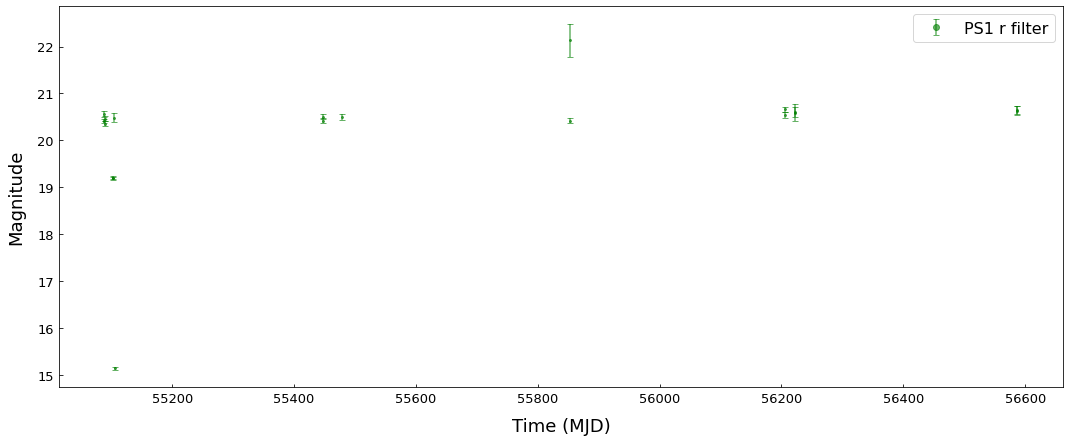

In [64]:
# select only  rows for that object
mask_object = ps1['_ra_'] == clqso[0]['ra']

# plot the light curve in r-band 
mask_filter = ps1['filterID'] == 2 

# combine the masks
mask = mask_object * mask_filter

# plot the figure
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot()

lc = ps1[mask]
ax.errorbar(lc['obsTime'], lc['mag'], yerr= lc['magerr'], 
            fmt='go', markersize=2,alpha=0.6,capsize=3, label='PS1 r filter')
ax.set_xlabel('Time (MJD)',fontsize = 18, labelpad=12)
ax.set_ylabel('Magnitude',fontsize = 18,labelpad=12)
ax.tick_params(direction='in', pad = 5, labelsize=13)
ax.legend(fontsize=16, markerscale=3)

In [ ]:
ps1[mask]


## Get the ZTF data 

The ZTF DR7 data https://www.ztf.caltech.edu/ztf-public-releases.html  can be downloaded using the `wget`-based function written by Paula Sanchez-Saez here https://github.com/LSST-sersag/dle/blob/main/activities/workshop/T2_Photometric_Reverberation_Mapping/Tutorial%202_PhotoRM_IJ.ipynb . I modify it to do just the downloading, because I prefer to read the files with astropy:

In [71]:
import pandas as pd
def get_ZTF_DR_lc(name, ra, dec, band, dr_path, keep_all_columns = False):
    
    """
    Author: Paula Sánchez Sáez, PhD
    
    Function to dowload an individual ZTF light curve using the ZTF API. 
    For more details about ZTF service, go to their documentation:
    https://irsa.ipac.caltech.edu/data/ZTF/docs/releases/dr08/ztf_release_notes_dr08.pdf 
    See section "iii. Querying Lightcurves using the API."
    
    Parameters:
    -----------
    name: str
        Object name (e.g. the object "SDSS J005132.94+180120.5" should be 
        refered here only by "J005132.94+180120.5")
    ra: float
        Right ascension of the object (in degrees).
    dec: float
        Declination of the object (in degrees).
    band: {'g', 'r', 'i'}
        ZTF photometric band.
    dr_path: str
        Path to the download directory.
    keep_all_columns: bool, default=False
        If False, only the most important light curve parameters will be retrieved. 
        Otherwise, keep all the columns.
        
    Returns:
    --------
    df: pd.DataFrame
        DataFrame containing the measurments of the retrieved light curve.
    """
    
    # make up a convenient filename
    fname = f'{name}_ZTF_{band}.csv'
    
    # don't download if the file already exists
    if os.path.exists(fname): 
        print(f'File {fname} already exists')
        
    else:
        file_path = os.path.join(dr_path, fname)
        irsa_path = "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves"
        url = f"{irsa_path}?POS=CIRCLE {ra} {dec} 0.000277778&BANDNAME={band}&FORMAT=csv"
        cmd = f'wget -O {file_path} '+ f'"{url}"' 
        print(cmd)
        os.system(cmd) 
   

In [11]:
3600*0.000277778

1.0000008

To make it work notice that  ZTF expects object name to have "J0016...", so we add that:

In [55]:
clqso["SDSSJID2"] = ["J"+name for name in clqso["SDSSJID"]]

Download all available ZTF data for CLQSO candidates:

In [62]:
name = row['SDSSJID2']
band='r'
ra = row["ra"]
dec = row["dec"]
cmd ='wget -O '+dr_path+name+'_DR_'+band+'band.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE '+str(ra)+' '+str(dec)+' 0.000277778&BANDNAME='+band+'&FORMAT=csv"'
print(cmd)

wget -O /Users/chris/GradResearch/2022_CLQSO_follow-up/code/ZTFJ235248.71-001518.4_DR_rband.csv "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE 358.203 -0.255 0.000277778&BANDNAME=r&FORMAT=csv"


In [ ]:
# make a directory if it doesn't exist yet
dr_path = os.path.join(os.getcwd(), 'ZTF')
if not os.path.exists(dr_path):
    os.mkdir(dr_path)

# download the ZTF data 
for row in clqso:
    for f in 'gri':
        get_ZTF_DR_lc(name=row['SDSSJID2'], 
                      ra=row["ra"], 
                      dec=row["dec"], 
                      band=f, 
                      dr_path=dr_path)
    


Not all of these objects have ZTF data... This can be checked with `wc -l *` :

In [ ]:
for f in 



In [16]:
# platform-agnostic solution
# get the file list 
filelist = os.listdir('ZTF/')
filelength = []
for file in filelist:
    filepath = os.path.join('ZTF', file)
    # open the file and count the lines 
    with open(filepath,"r") as f:
        flength =  len(f.readlines())
        # append that length to the file length array 
        filelength.append(flength)
        print(filepath,flength)

# select only those that have more than  4 points... 
file_array = np.array(filelist)
file_length_array = np.array(filelength)
N = 4 
mask = file_length_array > N

# make a new array selecting only files with more than N lines
file_array_long = file_array[mask]


ZTF/J235213.27-004326.3_ZTF_g.csv 1
ZTF/J030504.07+011324.5_ZTF_i.csv 1
ZTF/J222918.25-004003.6_ZTF_r.csv 1
ZTF/J203932.41-001818.3_ZTF_g.csv 161
ZTF/J010812.00-000516.5_ZTF_g.csv 105
ZTF/J001626.54+003632.4_ZTF_i.csv 1
ZTF/J215055.51-001739.4_ZTF_i.csv 1
ZTF/J031846.13-005622.8_ZTF_r.csv 1
ZTF/J221347.32+001928.4_ZTF_i.csv 1
ZTF/J021259.00-000550.1_ZTF_i.csv 52
ZTF/J012114.19-010310.8_ZTF_g.csv 224
ZTF/J012114.19-010310.8_ZTF_r.csv 242
ZTF/J031846.13-005622.8_ZTF_g.csv 1
ZTF/J010812.00-000516.5_ZTF_r.csv 183
ZTF/J222918.25-004003.6_ZTF_g.csv 1
ZTF/J203932.41-001818.3_ZTF_r.csv 192
ZTF/J032825.19-003252.3_ZTF_i.csv 15
ZTF/J235213.27-004326.3_ZTF_r.csv 1
ZTF/J025316.46+010759.7_ZTF_g.csv 1
ZTF/J232030.97-004039.2_ZTF_i.csv 1
ZTF/J001731.70+004910.1_ZTF_r.csv 1
ZTF/J023917.86-001916.8_ZTF_i.csv 1
ZTF/J001731.70+004910.1_ZTF_g.csv 1
ZTF/J025316.46+010759.7_ZTF_r.csv 1
ZTF/J005142.20+002129.0_ZTF_g.csv 175
ZTF/J215841.40-001507.7_ZTF_g.csv 1
ZTF/J022239.83+000022.5_ZTF_i.csv 1
ZTF/J003359.

array(['J203932.41-001818.3_ZTF_g.csv', 'J010812.00-000516.5_ZTF_g.csv',
       'J021259.00-000550.1_ZTF_i.csv', 'J012114.19-010310.8_ZTF_g.csv',
       'J012114.19-010310.8_ZTF_r.csv', 'J010812.00-000516.5_ZTF_r.csv',
       'J203932.41-001818.3_ZTF_r.csv', 'J032825.19-003252.3_ZTF_i.csv',
       'J005142.20+002129.0_ZTF_g.csv', 'J033431.17-000904.0_ZTF_g.csv',
       'J235248.71-001518.4_ZTF_r.csv', 'J235248.71-001518.4_ZTF_g.csv',
       'J033431.17-000904.0_ZTF_r.csv', 'J005142.20+002129.0_ZTF_r.csv',
       'J231032.17-011449.5_ZTF_g.csv', 'J205105.02-005847.5_ZTF_i.csv',
       'J231032.17-011449.5_ZTF_r.csv', 'J205105.02-005847.5_ZTF_g.csv',
       'J005513.15-005621.2_ZTF_r.csv', 'J205105.02-005847.5_ZTF_r.csv',
       'J215015.05-005331.4_ZTF_r.csv', 'J033431.17-000904.0_ZTF_i.csv',
       'J005142.20+002129.0_ZTF_i.csv', 'J215015.05-005331.4_ZTF_g.csv',
       'J235248.71-001518.4_ZTF_i.csv', 'J012114.19-010310.8_ZTF_i.csv',
       'J021259.00-000550.1_ZTF_g.csv', 'J010812.00

In [12]:
! wc -l ZTF/*

       1 ZTF/J001626.54+003632.4_ZTF_g.csv
       1 ZTF/J001626.54+003632.4_ZTF_i.csv
       1 ZTF/J001626.54+003632.4_ZTF_r.csv
       1 ZTF/J001731.70+004910.1_ZTF_g.csv
       1 ZTF/J001731.70+004910.1_ZTF_i.csv
       1 ZTF/J001731.70+004910.1_ZTF_r.csv
       1 ZTF/J003359.39+000230.0_ZTF_g.csv
       1 ZTF/J003359.39+000230.0_ZTF_i.csv
       1 ZTF/J003359.39+000230.0_ZTF_r.csv
     175 ZTF/J005142.20+002129.0_ZTF_g.csv
      13 ZTF/J005142.20+002129.0_ZTF_i.csv
     238 ZTF/J005142.20+002129.0_ZTF_r.csv
       1 ZTF/J005513.15-005621.2_ZTF_g.csv
       1 ZTF/J005513.15-005621.2_ZTF_i.csv
     248 ZTF/J005513.15-005621.2_ZTF_r.csv
     105 ZTF/J010812.00-000516.5_ZTF_g.csv
       7 ZTF/J010812.00-000516.5_ZTF_i.csv
     183 ZTF/J010812.00-000516.5_ZTF_r.csv
     224 ZTF/J012114.19-010310.8_ZTF_g.csv
      35 ZTF/J012114.19-010310.8_ZTF_i.csv
     242 ZTF/J012114.19-010310.8_ZTF_r.csv
       1 ZTF/J014303.23-004354.0_ZTF_g.csv
       1 ZTF/J014303.23-004354.0_ZTF_i.csv
       1 ZT

**Next:**

   * plot SDSS-r, PS1-r, ZTF-r without photometric offsets
   * apply offsets to ZTF data (PS1 not needed)
    

In [66]:
lc = Table.read(os.path.join("ZTF/J005142.20+002129.0_ZTF_g.csv"), format='csv')

In [67]:
lc

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
int64,int64,float64,float64,float64,float64,int64,str2,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64
398116200003850,56444214,2458318.9437737395,58318.4421412,20.188715,0.148561925,0,zg,12.9258352,0.3581377,0.503000021,0.0219999999,20180719442130,398,16.0,2.0,21.5100002,26.022934,0.0291860513,-0.0364010073,2.3867753e-05,30,1.56099999,1
398116200003850,56744182,2458321.943741912,58321.4418287,20.220993,0.15103519,0,zg,12.9258323,0.3580945,1.29999995,-0.273999989,20180722441817,398,16.0,2.0,21.6200008,26.0712204,0.0300714709,-0.0705891103,2.49805871e-05,30,1.505,1
398116200003850,58046409,2458334.967168585,58334.4640972,20.138958,0.144691929,0,zg,12.9259626,0.358081,0.65200001,-0.104999997,20180804464086,398,16.0,2.0,20.8899994,26.0762634,0.0307674464,-0.0634471253,3.10505347e-05,30,1.27999997,1
398116200003850,58341781,2458337.9211293305,58337.4178125,20.2997589,0.156894803,0,zg,12.9258351,0.3580738,1.41499996,0.112000003,20180807417801,398,16.0,2.0,21.5200005,26.0372963,0.0276717711,-0.0537689365,2.14585853e-05,30,1.39999998,1
398116200003850,58646081,2458340.964371791,58340.4608102,20.3387699,0.159674987,0,zg,12.9260444,0.3581251,1.14499998,0.206,20180810460799,398,16.0,2.0,21.1100006,25.7641506,0.0319564417,-0.0764217749,3.21859916e-05,30,1.26199996,1
398116200003850,58943862,2458343.9424151652,58343.4386227,20.249958,0.153222591,0,zg,12.9258816,0.3581248,1.10599995,0.131999999,20180813438553,398,16.0,2.0,21.7700005,26.0056839,0.0248786286,-0.0458719023,1.79495601e-05,30,1.28499997,1
398116200003850,59141212,2458345.9160700194,58345.4121296,20.3603477,0.161169261,0,zg,12.9259317,0.3581282,0.595000029,-0.00800000038,20180815412118,398,16.0,2.0,21.6900005,25.9894371,0.0275055058,-0.0714460611,2.12698815e-05,30,1.34099996,3
398116200003850,59247800,2458346.982027913,58346.4780093,20.4925919,0.16943267,0,zg,12.9257305,0.3581748,0.593999982,0.0909999982,20180816477998,398,16.0,2.0,21.3199997,25.9353027,0.0318488479,-0.0325130112,2.98525283e-05,30,1.255,3
398116200003850,59247892,2458346.9829422683,58346.4789236,20.202219,0.149600804,0,zg,12.9258816,0.358169,0.662999988,0.158999994,20180816478912,398,16.0,2.0,21.2700005,25.9479313,0.0341866724,-0.0348078683,3.4614488e-05,30,1.255,1


In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

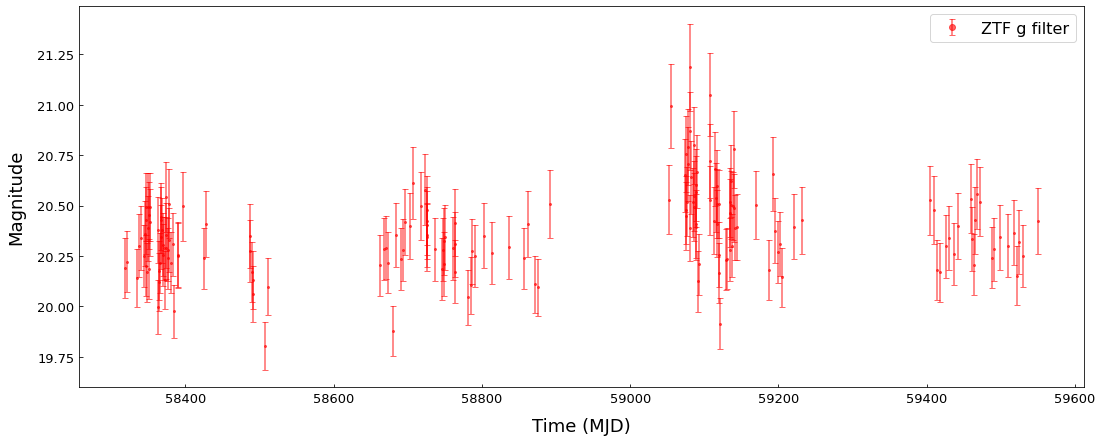

In [68]:
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot()

ax.errorbar(lc['mjd'], lc['mag'], yerr= lc['magerr'], 
            fmt='ro', markersize=2,alpha=0.6,capsize=3, label='ZTF g filter')
ax.set_xlabel('Time (MJD)',fontsize = 18, labelpad=12)
ax.set_ylabel('Magnitude',fontsize = 18,labelpad=12)
ax.tick_params(direction='in', pad = 5, labelsize=13)
ax.legend(fontsize=16, markerscale=3)

# Plot PS1-SDSS-ZTF 

Select an object that has PS1, SDSS, ZTF data. We know that we have the data for all 9258 quasars in Stripe82 from SDSS. We submitted queries for 40 of these to PS1 and ZTF databases. We need to find overlap between all of these, i.e. objects with SDSS, PS1, and ZTF data first. 

In [2]:
# list the clqso candidates
colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
            'f_Edd','Delta(mag)',
            'Delta(sigma_G)', 'MedianPS1']
clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                   names=colnames)

In [28]:
#display first three rows
clqso[:3]

dbID,SDSSJID,ra,dec,Redshift,log10_Lbol,log10_MBH,f_Edd,Delta(mag),Delta(sigma_G),MedianPS1
str9,str18,float64,float64,float64,float64,str4,str5,float64,float64,float64
123909,001626.54+003632.4,4.111,0.609,3.24,46.57,9.47,-1.0,-0.29,-0.054,20.48
8442,001731.70+004910.1,4.382,0.819,2.43,46.61,9.09,-0.58,-0.36,-0.107,20.36
4069419,003359.39+000230.0,8.497,0.042,1.64,45.95,9.05,-1.21,0.22,0.017,20.2


In [36]:
# list all PS1 light curves
ps1 = Table.read('CLQSO_candidates_PS1_DR2.csv', format='csv')

In [38]:
# check how many unique ra values there are  - do we have PS1 data for all 40 clqso?
len(np.unique(ps1['_ra_']))

40

Yes, we do - this means that we can plot SDSS-PS1 data for any of these 40 objects.  How about ZTF data? 

In [1]:
# Imports
import os
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

def flux2absigma(flux, fluxsigma):
    """Compute AB mag sigma given flux and flux sigma

    Here units of flux,  fluxsigma  don't matter 
    as long as they are consistent, since we are dividing 
    one by the other, so all the units cancel out.
    """
    FIVE_OVER_2LOG10 = 1.085736204758129569
    return FIVE_OVER_2LOG10 * fluxsigma / flux;


def flux2ab(flux, unit = 'Jy'):
    """Compute AB mag given flux. 

    Accept two unit types :  
    *  'cgs', meaning flux is in  ergs / s / Hz / cm2
    *  'Jy', meaning flux is in Jy.  1 Jy = 1E-23 * ergs/s/Hz/cm2
    """
    if unit == 'Jy':
        return -2.5 * np.log10(flux) + 8.90
    elif unit == 'cgs':
        return -2.5 * np.log10(flux) - 48.6
    
    
def get_ztf_file_list():# platform-agnostic solution
    # get the file list 
    filelist = os.listdir('ZTF/')
    filelength = []
    for file in filelist:
        filepath = os.path.join('ZTF', file)
        # open the file and count the lines 
        with open(filepath,"r") as f:
            flength =  len(f.readlines())
            # append that length to the file length array 
            filelength.append(flength)
            #print(filepath,flength)

    # select only those that have more than  4 points... 
    file_array = np.array(filelist)
    file_length_array = np.array(filelength)
    N = 4 
    mask = file_length_array > N

    # make a new array selecting only files with more than N lines
    file_array_long = file_array[mask]
    return file_array_long




In [14]:
def add_numbers(a,b=0):
    print(f'a={a}, b={b}')
    

In [16]:
add_numbers(a=6, b=3)

a=6, b=3


In [2]:
def count_ztf_r_band():
    # get a list of all ZTF light curves
    ztf_all_bands = get_ztf_file_list()

    # select only r-band objects
    ztf_r_band = [file for file in ztf_all_bands if file.__contains__('_r.')]
    print(f'There are {len(ztf_r_band)} light curves with ZTF r-band data')


def get_data_to_dict(N):
    # only a few light curves have ZTF r-band data...
    # make dictionary to store data
    data_r_band = {}
    
    # get a list of all ZTF light curves
    ztf_all_bands = get_ztf_file_list()

    # select only r-band objects
    ztf_r_band = [file for file in ztf_all_bands if file.__contains__('_r.')]
    
    # read the ZTF data
    # select N-th light curve 
    ztf_lc = Table.read(os.path.join("ZTF/",
                                     ztf_r_band[N]), format='csv')
   
    # store the name of the file for the ZTF 
    data_r_band['ZTF_filename'] = ztf_r_band[N]
    
    # select SDSS data  - the files from SDSS are named 
    # after dbID, need clean dbID
    sdss_jid = ztf_r_band[N].split('_')[0][1:]
    
    # store that JID 
    data_r_band['SDSS_JID'] = sdss_jid
    
    # list the clqso candidates
    colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
                'f_Edd','Delta(mag)',
                'Delta(sigma_G)', 'MedianPS1']
    clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                       names=colnames)

    mask =  clqso['SDSSJID'] == sdss_jid
    clqso_row = clqso[mask]
    sdss_dbid = clqso_row['dbID'][0]
    sdss_dbid_clean = sdss_dbid.split('^')[0] # remove the "^b" part from dbID
    
    # store that identifier
    data_r_band['SDSS_dbID'] = sdss_dbid_clean
    
    # translate ZTF r to synthetic SDSS r 
    path = os.getcwd()
    file_path = os.path.join(path, "DB_QSO_S82.dat.gz")
    
    # we know the column meaning from 
    # https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_DB.html
    colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                       'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
    SDSS_DB_QSO = Table.read(file_path, format='ascii', names = colnames)

    mask = SDSS_DB_QSO['dbID'] == int(sdss_dbid_clean)
    gi = SDSS_DB_QSO[mask]['g'][0]-SDSS_DB_QSO[mask]['i'][0]
    
    # store the original ZTF r-band data just in case,
    # before they get overwritten 
    data_r_band['ztf_original'] = ztf_lc[['mjd','mag','magerr']]
    #r_SDSS_synth = r_ZTF  + 0.01  + 0.04  * gi
    # just overwrite the old value of magnitude
    # with the new value
    
    ztf_lc['mag'] = ztf_lc['mag']+ 0.01  + 0.04  * gi
    data_r_band['ztf_synthetic'] = ztf_lc[['mjd','mag','magerr']]

    # read in the SDSS light curve
    sdss_lc = Table.read(os.path.join('QSO_S82/', sdss_dbid_clean), format='ascii')

    # given the file structure explained in 
    # https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_LC.html
    # rename the relevant columns
    # and do not keep the filter name
    # in the column name,
    # i.e. mag rather than mag_r , 
    # given that for all surveys we are only
    # selecting (for now) data in r-band 
    old_names = ['col7', 'col8', 'col9'] # r-band mjd, mag, magerr are cols 7,8,9
    new_names =  ['mjd', 'mag', 'magerr']
    sdss_lc.rename_columns(old_names, new_names)
    sdss_lc_select = sdss_lc[new_names]

    # -99 means missing data - ignore those
    mask = sdss_lc_select['mag'] > 0
    # store in a dictionary
    data_r_band['sdss'] = sdss_lc_select[mask]

    # add PS1 data 
    # list all PS1 light curves
    ps1 = Table.read('CLQSO_candidates_PS1_DR2.csv', format='csv')

    # select only  rows for that object
    mask_object = ps1['_ra_'] == clqso_row['ra'][0]

    # plot the light curve in r-band 
    mask_filter = ps1['filterID'] == 2 

    # combine the masks
    mask_ps1 = mask_object * mask_filter
    ps1_select = ps1[mask_ps1]['_ra_', '_dec_', 'obsTime', 'nr', 'psfFlux', 'psfFluxErr']

    # calculate AB magnitudes
    ps1_select['mag'] = flux2ab(ps1_select['psfFlux'])
    ps1_select['magerr'] = flux2absigma(ps1_select['psfFlux'], ps1_select['psfFluxErr'])

    # rename obsTime to mjd
    ps1_select.rename_column('obsTime', 'mjd')

    # add to the dictionary
    data_r_band['ps1'] = ps1_select

    # return the dic and the  object name 
    return data_r_band

def plot_combined_data(data, 
                       surveys=['sdss','ps1', 'ztf_synthetic'],
                       labels=['SDSS','PS1','ZTF r-synth']):
    fig, ax = plt.subplots(1,1, figsize=(12,4))
    
    for survey,label in zip(surveys,labels):
        lc = data[survey]
        ax.errorbar(lc['mjd'], lc['mag'], yerr= lc['magerr'], 
                    fmt='o', markersize=2, 
                    alpha=0.6, capsize=3, 
                    label=label
                   )

    #ax.set_ylim(14,22)   
    ax.set_xlabel('Time (MJD)',fontsize = 18, labelpad=12)
    ax.set_ylabel('Magnitude',fontsize = 18,labelpad=12)
    ax.tick_params(direction='in', pad = 5, labelsize=13)
    ax.legend(fontsize=16, markerscale=3, )
    name = data['SDSS_JID']
    ax.set_title(f'Light curve {name} r-band')
    
    # invert y-axis because smaller value of magnitude means brighter object
    ax.invert_yaxis() 
   

Perform day-averaging , similar as https://github.com/suberlak/CRTS_PROJECT/blob/master/A_Fig_1_QSO_CRTS_day_averaged_stats.ipynb  or https://github.com/suberlak/PS1_SDSS_CRTS/blob/master/code2/Combine_PS1_SDSS_ZTF.ipynb 


First, illustrate the effect of day-averaging:

In [75]:
# ztf 
# mjds = data_r_band['ztf_original']['mjd'].data-0.5
# mag = data_r_band['ztf_original']['mag'].data
# err = data_r_band['ztf_original']['magerr'].data

# ps1 
mjds = data_r_band['ps1']['mjd'].data-0.5
mag = data_r_band['ps1']['mag'].data
err = data_r_band['ps1']['magerr'].data

mjd_int = [int(mjd) for mjd in mjds ]

In [76]:
mjd_unique = np.unique(mjd_int)
n_unique = len(mjd_unique)
n_total = len(mjd_int)
print(f'Unique days:{n_unique} total number of observations: {n_total}')

Unique days:11 total number of observations: 19


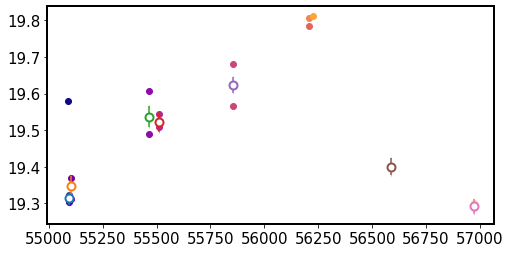

In [77]:
fig,ax=  plt.subplots(1,1,figsize=(8,4))
color_idx = np.linspace(0, 1, n_unique)
ax_legend_handles = []
cmap = plt.cm.plasma 

# iterate over unique mjds
for i in range(n_unique):
    # plot those that are equal to unique mjds 
    mjd_day = mjd_unique[i]
    mask = mjd_int == mjd_day
    
    # select color 
    color = cmap(color_idx[i])
    
    # select points and plot
    mjd_points = np.array(mjds)[mask]
    mag_points = mag[mask]
    ax.scatter(mjd_points, mag_points, color=color, )
    
    # average the selected points...
    # but only if there is more than one point per day
    if np.sum(mask)>1:
        err_points = err[mask]
        w = 1/(err_points*err_points)
        avgmag = np.average(mag_points, weights = w)       
        avgerr = 1.0 / np.sqrt(np.sum(w))
        avgmjd = np.mean(mjd_points)
        # increase error if too small 
        if avgerr < 0.02 : 
            avgerr = np.sqrt(avgerr**2.0 + 0.01**2.0)  

        #ax.scatter(mjd_points, avgmag, s=20)
        ax.errorbar(avgmjd, avgmag, avgerr, 
                   fmt="o", capsize=0.2, markersize=8,
                 mfc='white', mew=2 , label='')
        
    # plot vertical line at that mjd
    #ax.axvline(mjd_day-0.5)

#ax[i].scatter(xy[0], xy[1], s=20, marker="+", c="m", lw=2)
#ax.set_xlim(58325,58375)

Store the day-averaged light curve... Flag points that depart more than 5-sigma,  and those that have error over 5 times that of the sigmaG of the errors for the entire  light curve (in that survey) ...



In [3]:
def average_data(data, 
                 surveys_to_average=['ps1','ztf_synthetic'],
                Nsigma = 5):
    ''' A quick function to day-average the data. 
    Add to the original data table columns with 
    number of points per day, error-weighted average magnitude,
    average mjd, weighter error, and boolean flag columns indicating
    that a given point has anomalously large (>5sigmaG) departure 
    in magnitude space or in the photometric uncertainty space 
    (using the unaveraged quantities). Methodology of adding an 
    uncertainty floor of 0.02 mag follows Suberlak+2017 
    https://faculty.washington.edu/ivezic/Publications/Suberlak2017.pdf 
    
    Parameters:
    -----------
    data : a dictionary containing light-curve data for 
    each survey, with each data[survey] including 
    mjd, mag, magerr
    surveys_to_average : names of surveys to average, 
    assumed to be the keys of data dictionary 
    Nsigma: float, multiplier of sigmaG that sets the 
        threshold for large departure in magnitude or 
        error distribution
    
    '''
    for survey in surveys_to_average: 

        # select all data points for that light curve 
        mjds = data[survey]['mjd'].data
        mag = data[survey]['mag'].data
        err = data[survey]['magerr'].data

        # find unique days 
        mjd_int = [int(mjd) for mjd in mjds ]

        # count unique days 
        mjd_unique = np.unique(mjd_int)
        n_unique = len(mjd_unique)
        n_total = len(mjd_int)
        print(f'\n{survey}')
        print(f'Unique days:{n_unique} total number of observations: {n_total}')

        # prepare storage arrays 
        n_obs_day = np.zeros_like(mjds)
        avgmjd_ = np.zeros_like(mjds)
        avgmag_ = np.zeros_like(mjds)
        avgerr_ = np.zeros_like(mjds)
        large_error  = np.zeros_like(mjds, dtype=bool)
        large_departure = np.zeros_like(mjds, dtype=bool)


        # flag points that depart more 
        # than 5 sigmaG from mag distribution...
        #Nsig = 5 
        x = mag
        sigmaGmag =  0.7413 * (np.percentile(x,75) -\
                            np.percentile(x,25))
        msig = np.abs(np.ma.median(x) - x) > Nsigma *sigmaGmag
        large_departure =  msig

        # flag points that have error more than 
        # 5*sigmaG from the median of  error distribution...
        x  = err
        sigmaGerr =  0.7413 * (np.percentile(x,75) -\
                             np.percentile(x,25))
        merr = np.abs(np.ma.median(x) - x)   > Nsigma *  sigmaGerr
        large_error = merr
        
        # perform day-averaging 
        # iterate over all days
        for i in range(n_unique):
            # select points from a given day 
            mjd_day = mjd_unique[i]
            mask = mjd_int == mjd_day

            # count points and store
            n_points = np.sum(mask)
            n_obs_day[mask] = n_points

            # select points and plot
            mjd_points = np.array(mjds)[mask]
            mag_points = mag[mask]

            # average the selected points...
            # but only if there is more than one point per day
            if n_points>1:
                err_points = err[mask]
                w = 1/(err_points*err_points)
                avgmag = np.average(mag_points, weights = w)       
                avgerr = 1.0 / np.sqrt(np.sum(w))
                avgmjd = np.mean(mjd_points)
                # increase error if too small 
                if avgerr < 0.02 : 
                    avgerr = np.sqrt(avgerr**2.0 + 0.01**2.0)  

                # store the averaged mjd, mag, magerr
                avgmag_[mask] = avgmag
                avgmjd_[mask] = avgmjd
                avgerr_[mask] = avgerr

        # store that information 
        data[survey]['Nday'] = n_obs_day
        data[survey]['avgmjd'] = avgmjd_
        data[survey]['avgmag'] = avgmag_
        data[survey]['avgerr'] =  avgerr_
        data[survey]['large_error']= large_error
        data[survey]['large_departure'] = large_departure
        
        # store the value of N sigma that was used to flag the points
        data['Nsigma'] = Nsigma
    # return the updated dictionary 
    return data

In [7]:
def plot_averaged_data(data, 
                       surveys = ['sdss','ps1','ztf_synthetic'], 
                       averaged = ['ps1', 'ztf_synthetic'],
                       labels = {'sdss':'SDSS',
                                'ps1':'PS1',
                                'ztf_synthetic':'ZTF r-synth'},
                       colors = {'sdss':'#1f77b4',
                                 'ps1':'#2ca02c', 
                                 'ztf_synthetic':'#9467bd'},
                       plot_flagged = True
                      ):
    ''' A function to plot the day-averaged data
    
    Parameters:
    ----------
    data: a dictionary with keys corresponding to the surveys to plot 
    surveys: a list of surveys to plot
    labels: dict of labels to use for each survey 
    averaged: which surveys were day-averaged
    colors: dict of colors to use for plotting 
    plot_flagged: boolean - whether  or not to plot flagged points
    '''

    fig, ax = plt.subplots(1,1, figsize=(12,4), dpi=150)

    # plot SDSS, which was not day-averaged 
    survey='sdss'
    lc = data[survey]
    points = ax.errorbar(lc['mjd'], lc['mag'], yerr= lc['magerr'], 
                fmt='o', markersize=2, 
                alpha=0.6, capsize=3, 
                label=labels[survey],
                color=colors[survey]
               )
    
    for survey in averaged:
        # only plot original if there are no averaged for PS1, ZTF 
        
        # select which points had only one observation per day 
        mask = data[survey]['Nday'] == 1 

        # do not plot flagged points if not needed 
        if not plot_flagged: 
            m1 = data[survey]['large_error'] # True if large error
            m2 = data[survey]['large_departure'] # True if large departure 
            m12 = m1|m2   # logical OR - True if either large error OR large departure 
            mask_flagged  = ~m12 # True only for not flagged points 
            mask = mask &mask_flagged # logical AND
            
        lc = data[survey]
        points = ax.errorbar(lc['mjd'][mask], 
                    lc['mag'][mask], 
                    yerr= lc['magerr'][mask], 
                fmt='o', markersize=2, 
                alpha=0.6, capsize=3, 
                label=labels[survey],
                 color=colors[survey]
              )

        print(f'{survey} single point color is {points[0].get_color()}')

        # select which points  had more than one point per day 
        mask = data[survey]['Nday']>1
        # do not plot flagged points if not needed 
        if not plot_flagged: 
            m1 = data[survey]['large_error'] # True if large error
            m2 = data[survey]['large_departure'] # True if large departure 
            m12 = m1|m2   # logical OR - True if either large error OR large departure 
            mask_flagged  = ~m12 # True only for not flagged points 
            mask = mask & mask_flagged # logical AND
            
        points = ax.errorbar(data[survey]['avgmjd'][mask],
                    data[survey]['avgmag'][mask],
                    data[survey]['avgerr'][mask],
                    fmt=".",  markersize=10, mfc='white', mew=2 , label='',
                            color=colors[survey])
        #print(f'{survey} averaged color is {points[0].get_color()}')
        
        # circle points that have 5sigma departure 
        if plot_flagged:
            # read the Nsigma parameter used for flagging 
            Nsig = data['Nsigma']
            for flag,color,label in zip(['large_error', 'large_departure'],
                                    ['magenta','orange'],
                                    [str(Nsig)+r'$\sigma$ err',
                                     str(Nsig)+r'$\sigma$ mag']):
                mask = data[survey][flag]
                ax.scatter(data[survey]['mjd'][mask],
                            data[survey]['mag'][mask],
                            s=80, facecolors='none', edgecolors=colors[survey], 
                      label='')

    # add title, ticks, labels, etc. 
    ax.set_xlabel('Time (MJD)', fontsize = 18, labelpad=12)
    ax.set_ylabel('Magnitude', fontsize = 18 , labelpad=12)
    ax.tick_params(direction='in', pad = 5, labelsize=13)
    ax.legend(fontsize=16, markerscale=3, )
    name = data['SDSS_JID']
    ax.set_title(f'Light curve {name} r-band')

    # invert y-axis because smaller value of magnitude means brighter object
    ax.invert_yaxis() 
    name = data['SDSS_JID'][:5]
    suffix = ''
    if plot_flagged:
        suffix = 'with_flagged'
    fname = f'sdss_ztf_ps1_{name}_combined_{suffix}.png'
    plt.savefig(fname, bbox_inches='tight',
               transparent=False,facecolor='white',)
    print(f'Saved as {fname} in {os.getcwd()}')


ps1
Unique days:5 total number of observations: 10

ztf_synthetic
Unique days:245 total number of observations: 330
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_03282_combined_.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code


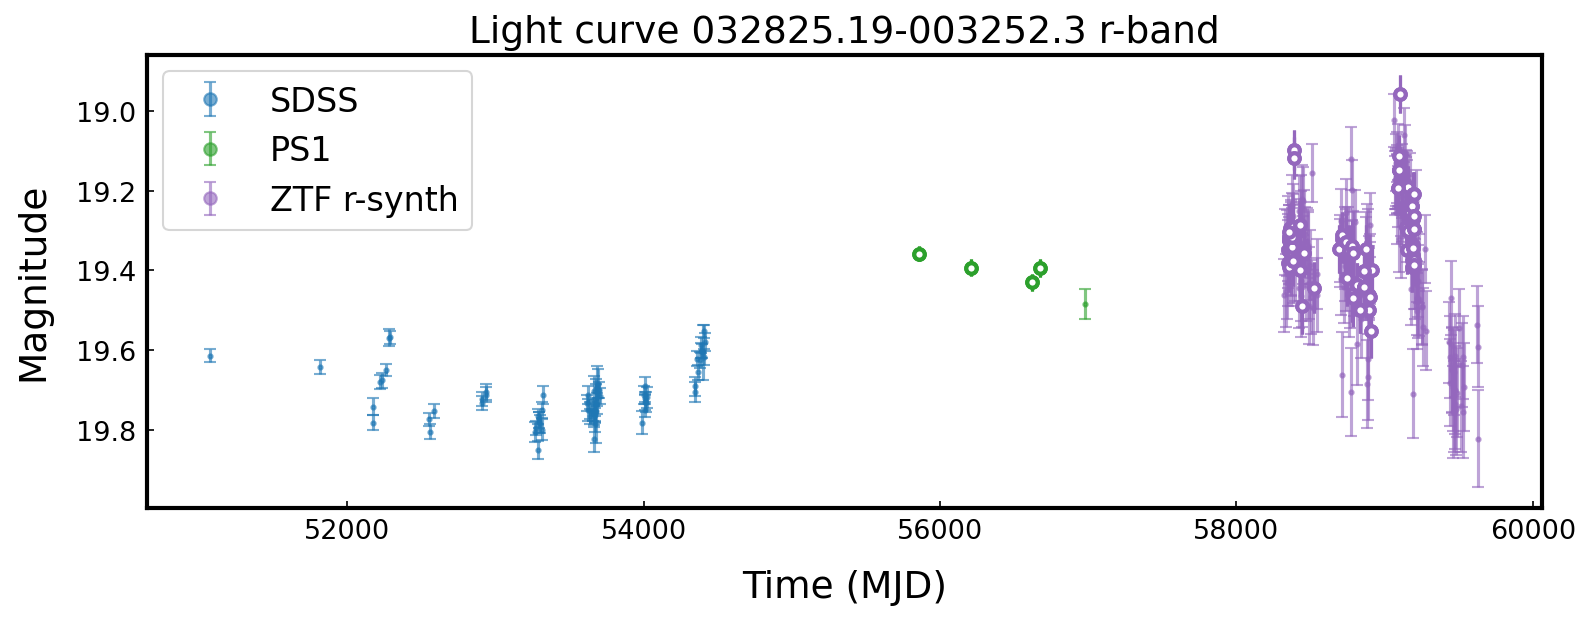

In [9]:
data = get_data_to_dict(N=10)
data = average_data(data, surveys_to_average=['ps1','ztf_synthetic'],Nsigma = 5)
plot_averaged_data(data, plot_flagged=False)


ps1
Unique days:10 total number of observations: 20

ztf_synthetic
Unique days:203 total number of observations: 241
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_01211_combined_.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code

ps1
Unique days:7 total number of observations: 14

ztf_synthetic
Unique days:146 total number of observations: 182
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_01081_combined_.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code

ps1
Unique days:9 total number of observations: 20

ztf_synthetic
Unique days:171 total number of observations: 191
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_20393_combined_.png in /Users/chris/GradResearch/2022_CLQSO_follow-up/code

ps1
Unique days:12 total number of observations: 30

ztf_synthetic
Unique days:177 total number of observations: 267
ps1 s

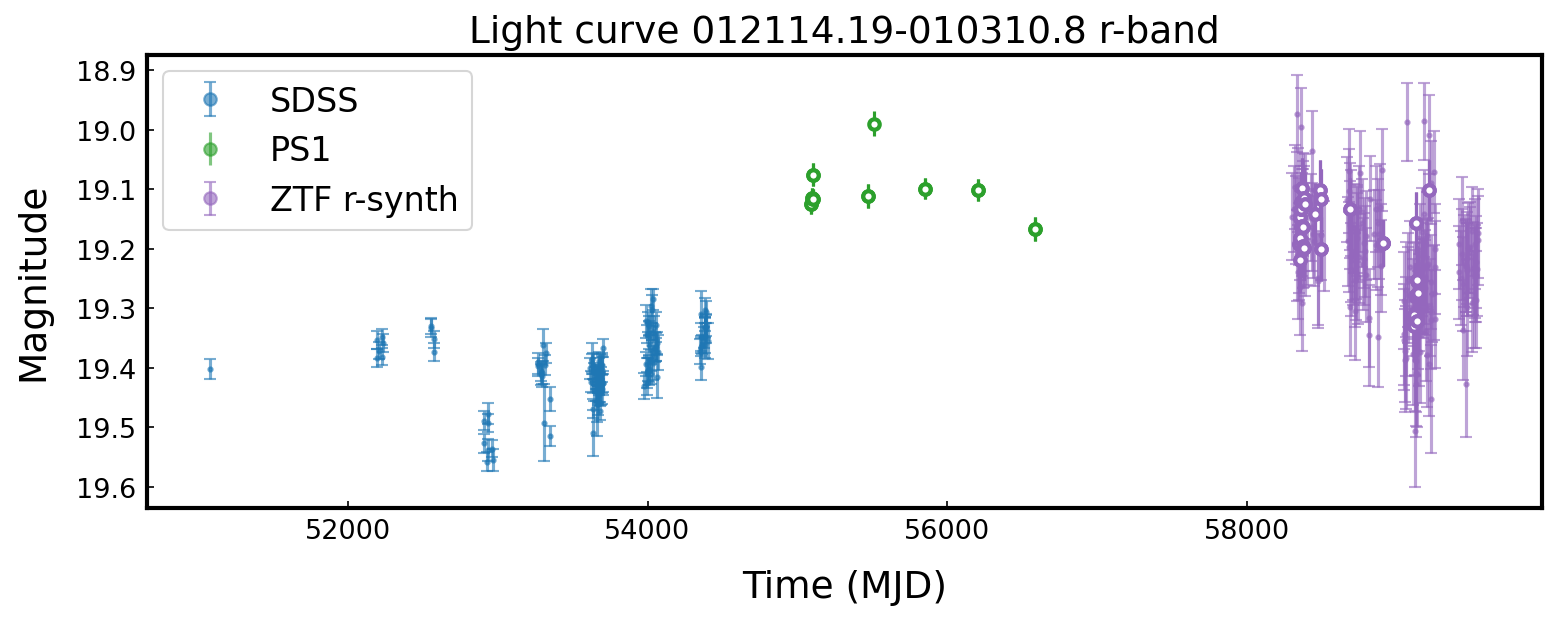

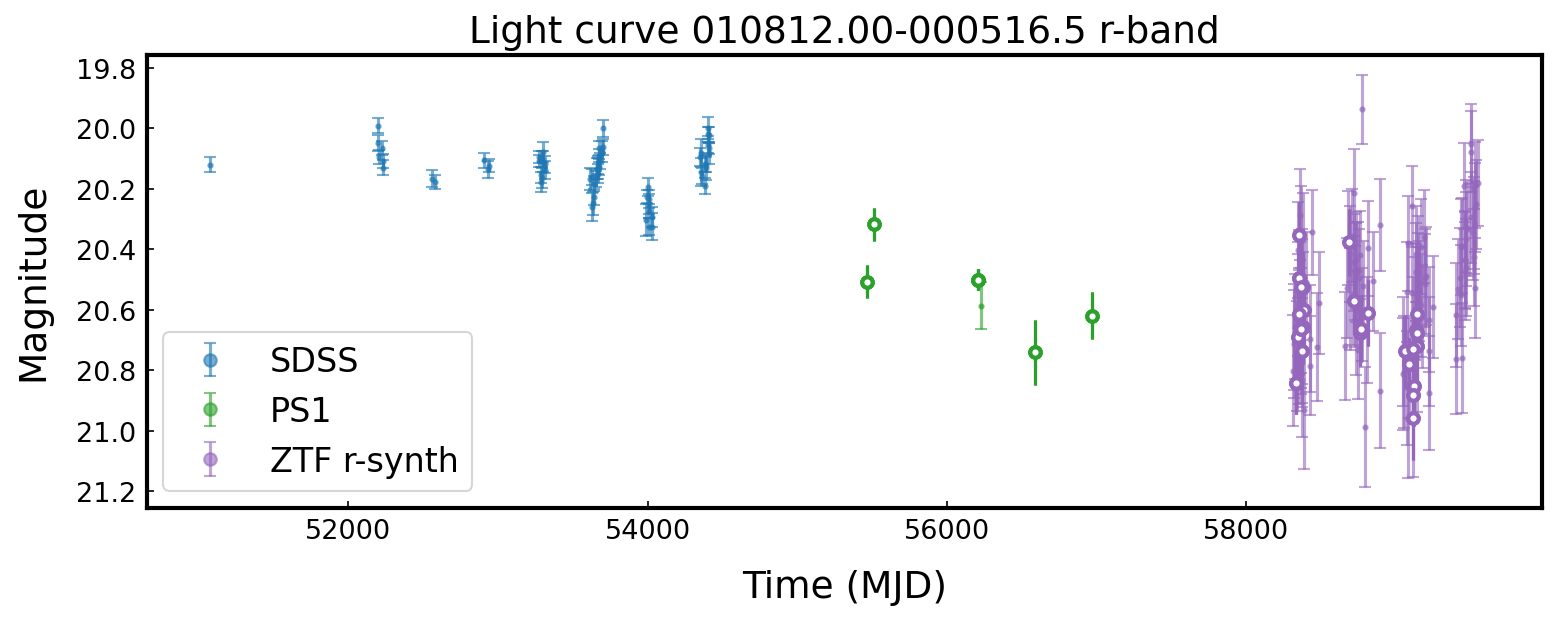

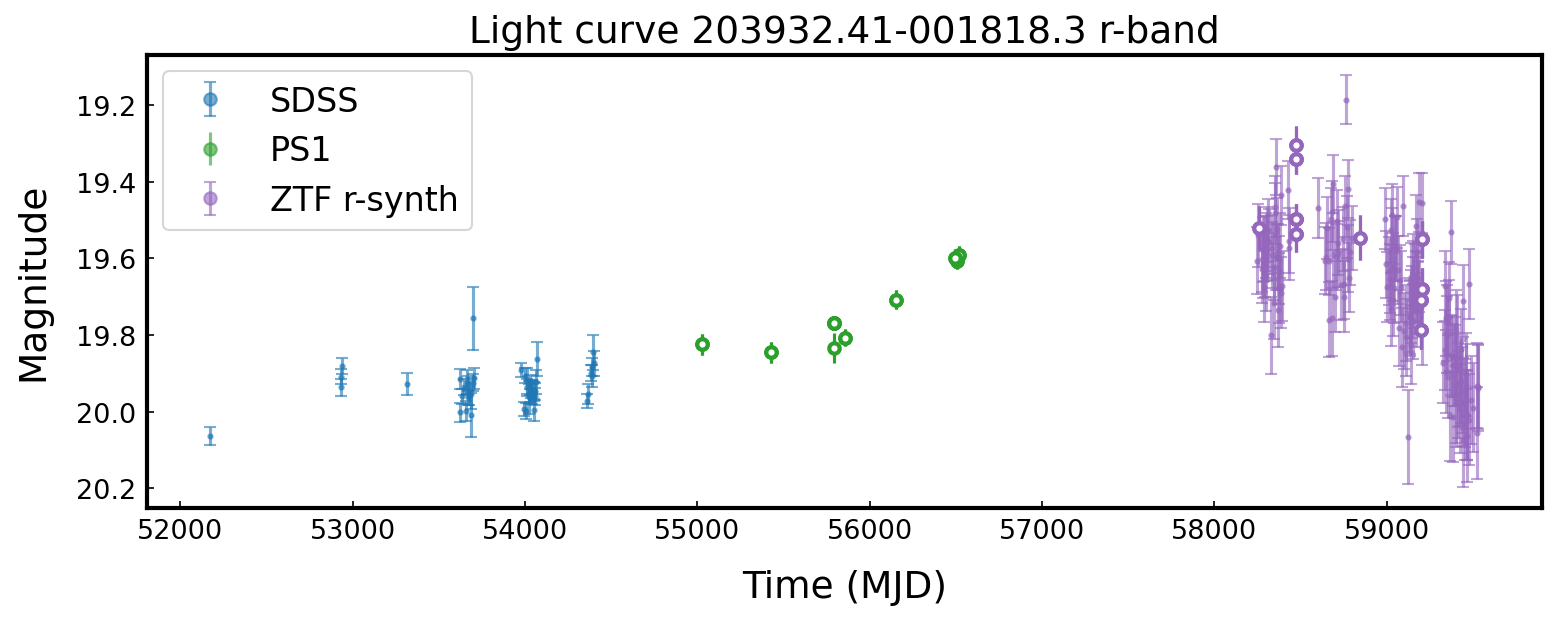

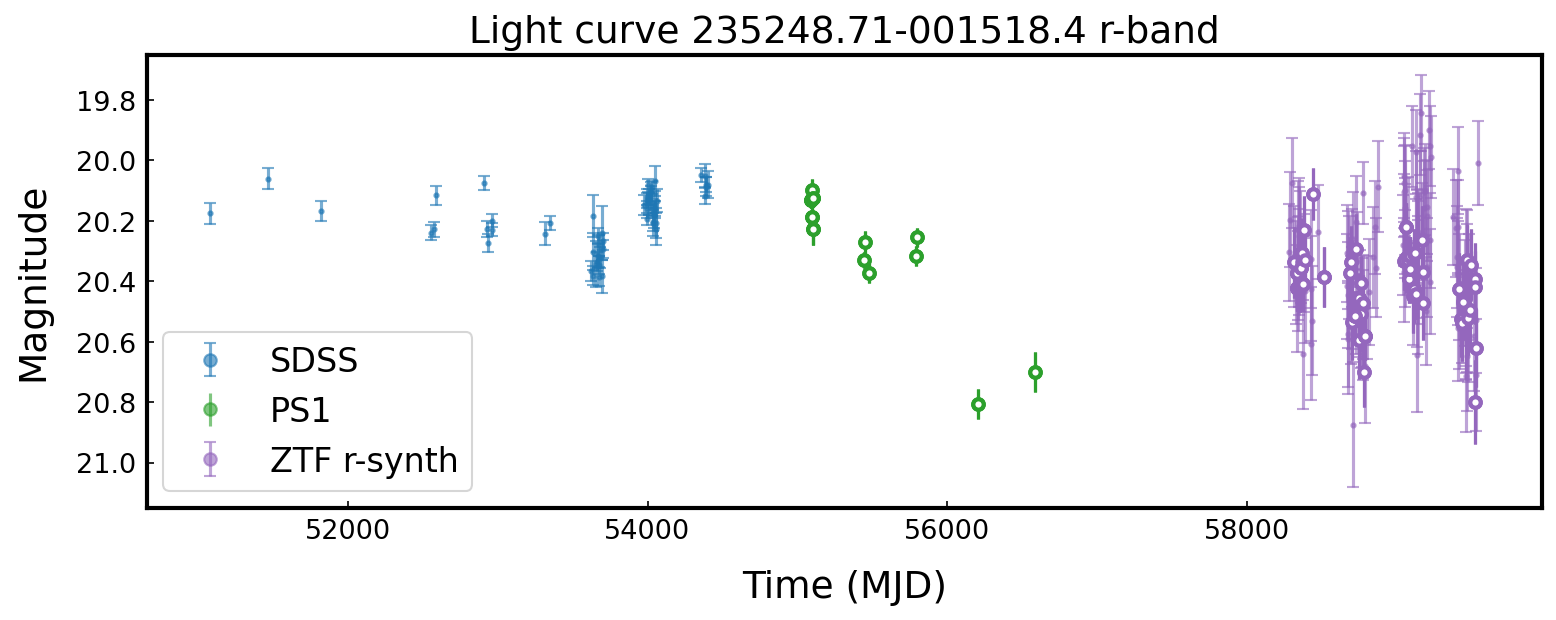

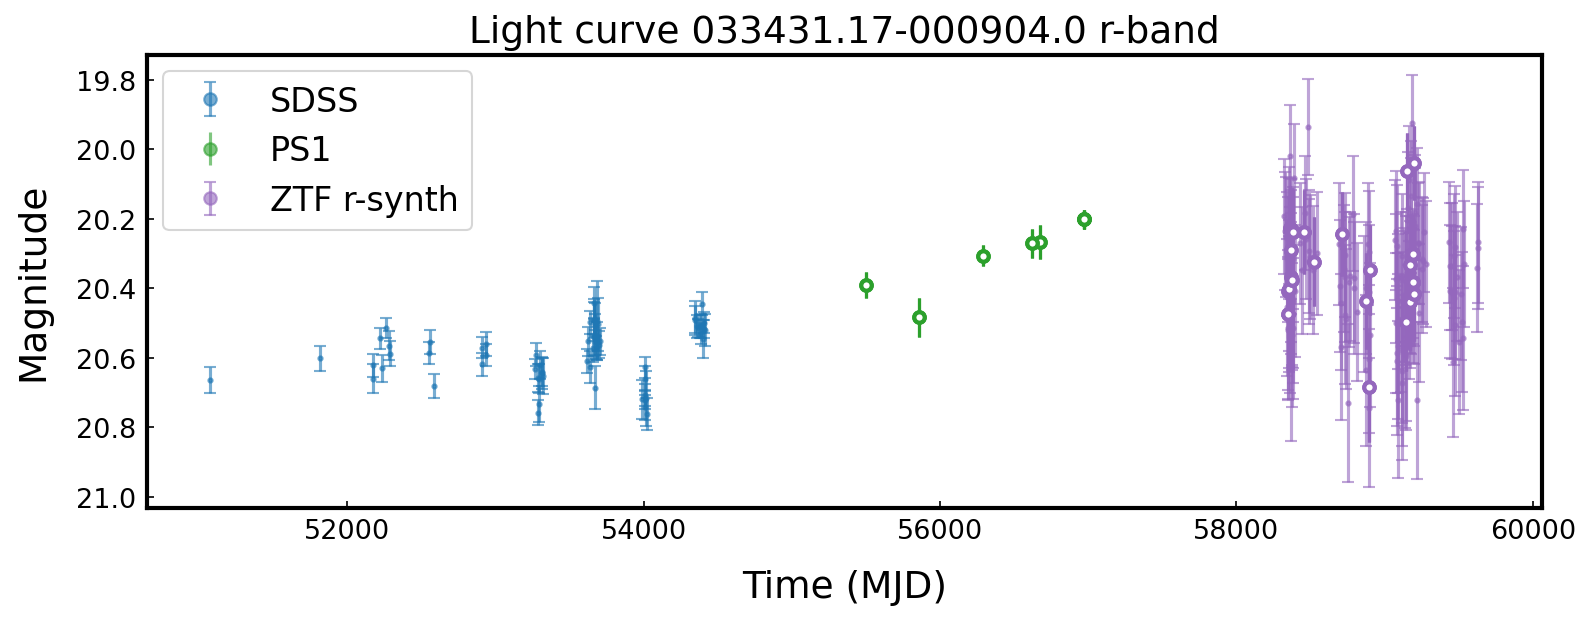

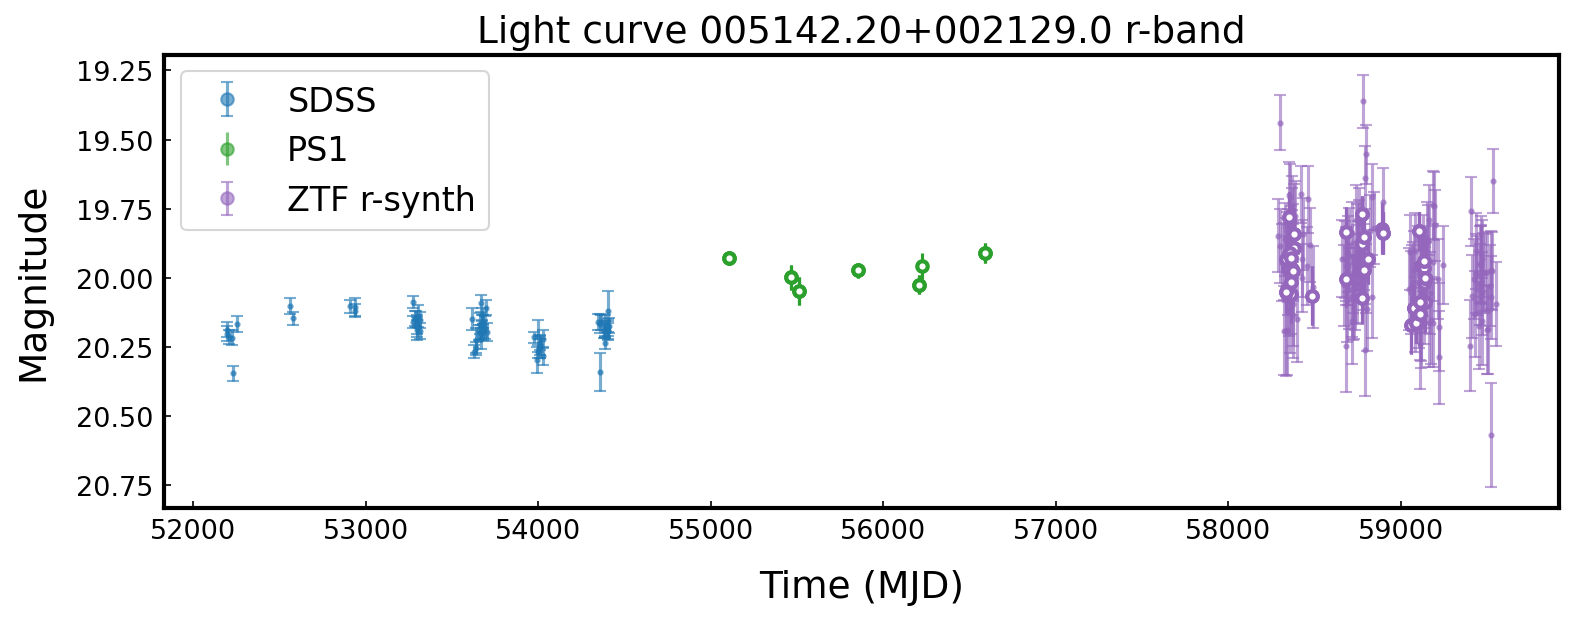

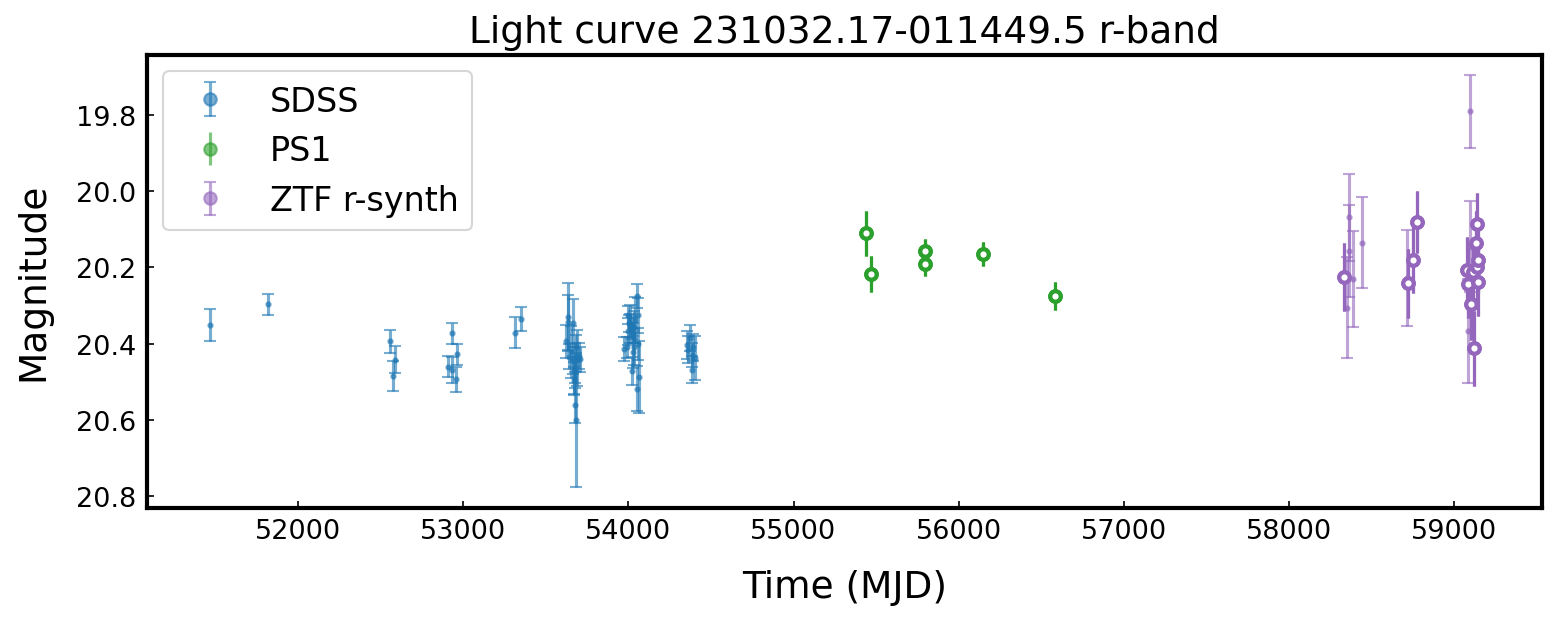

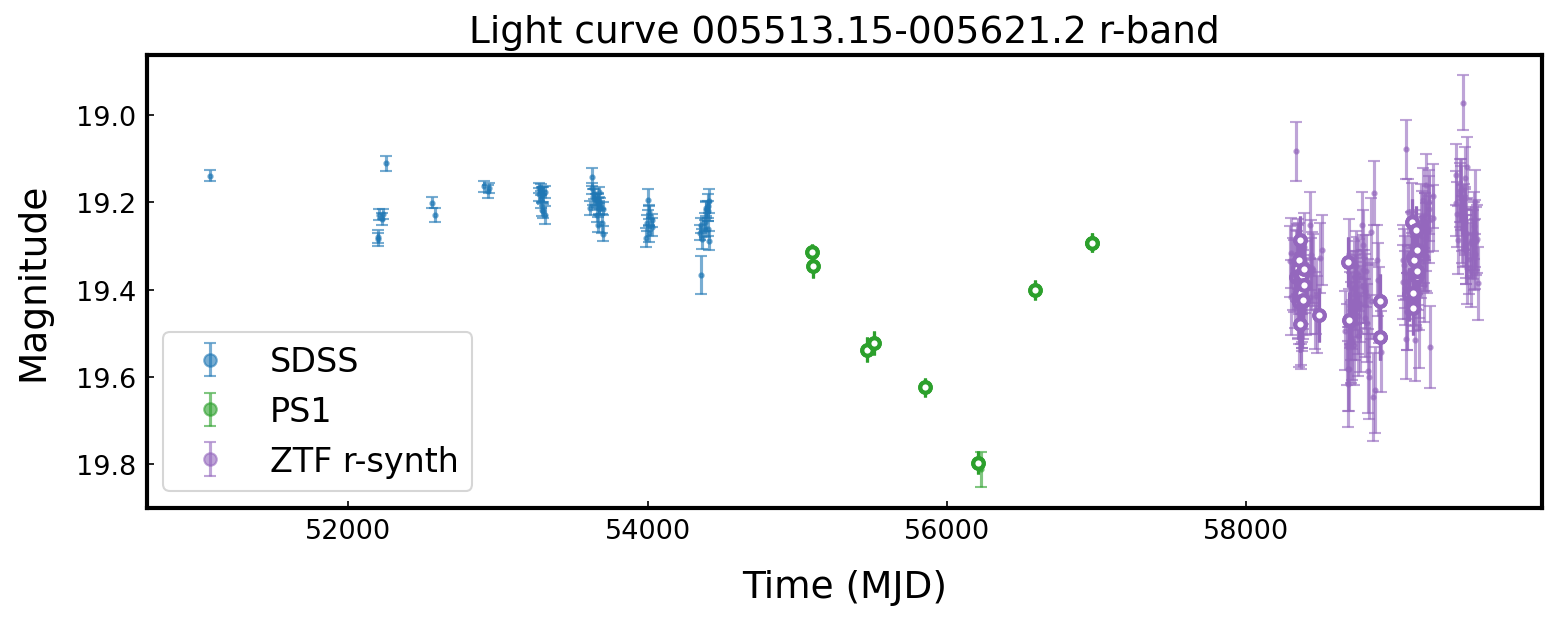

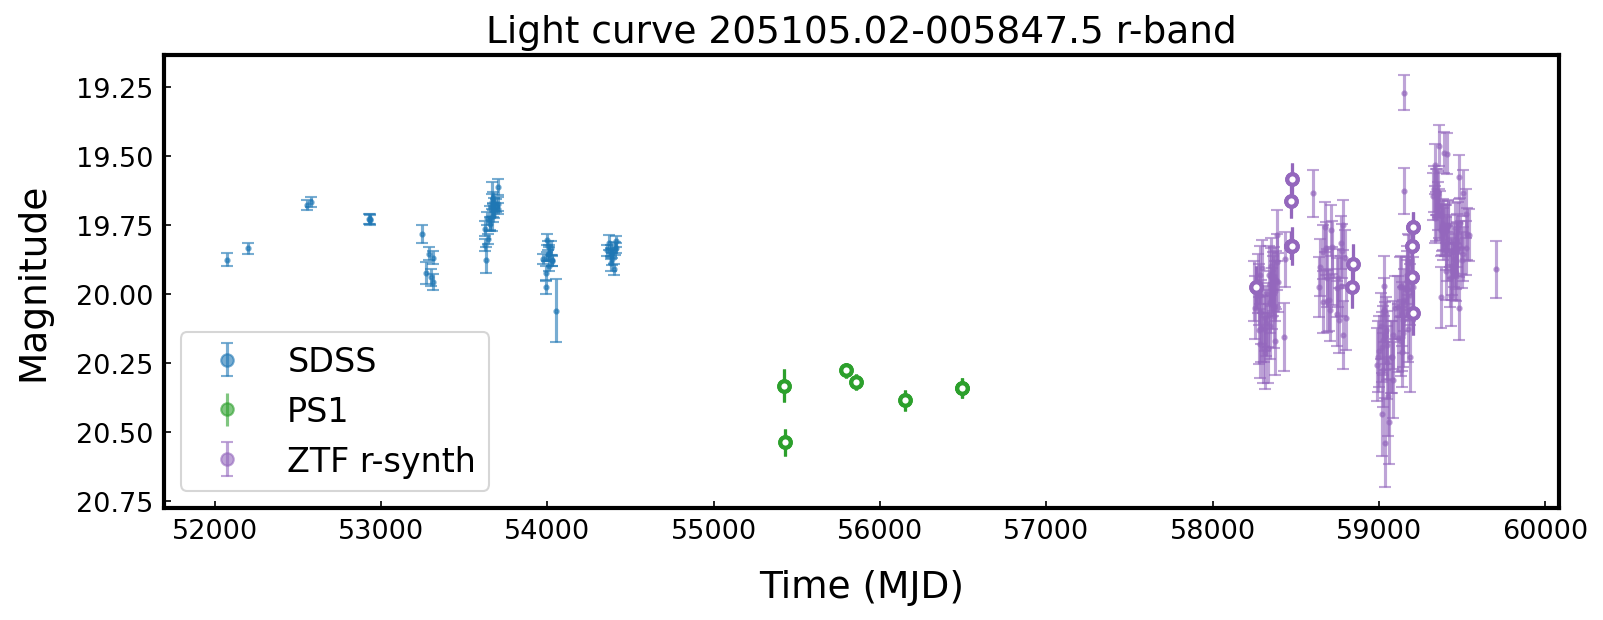

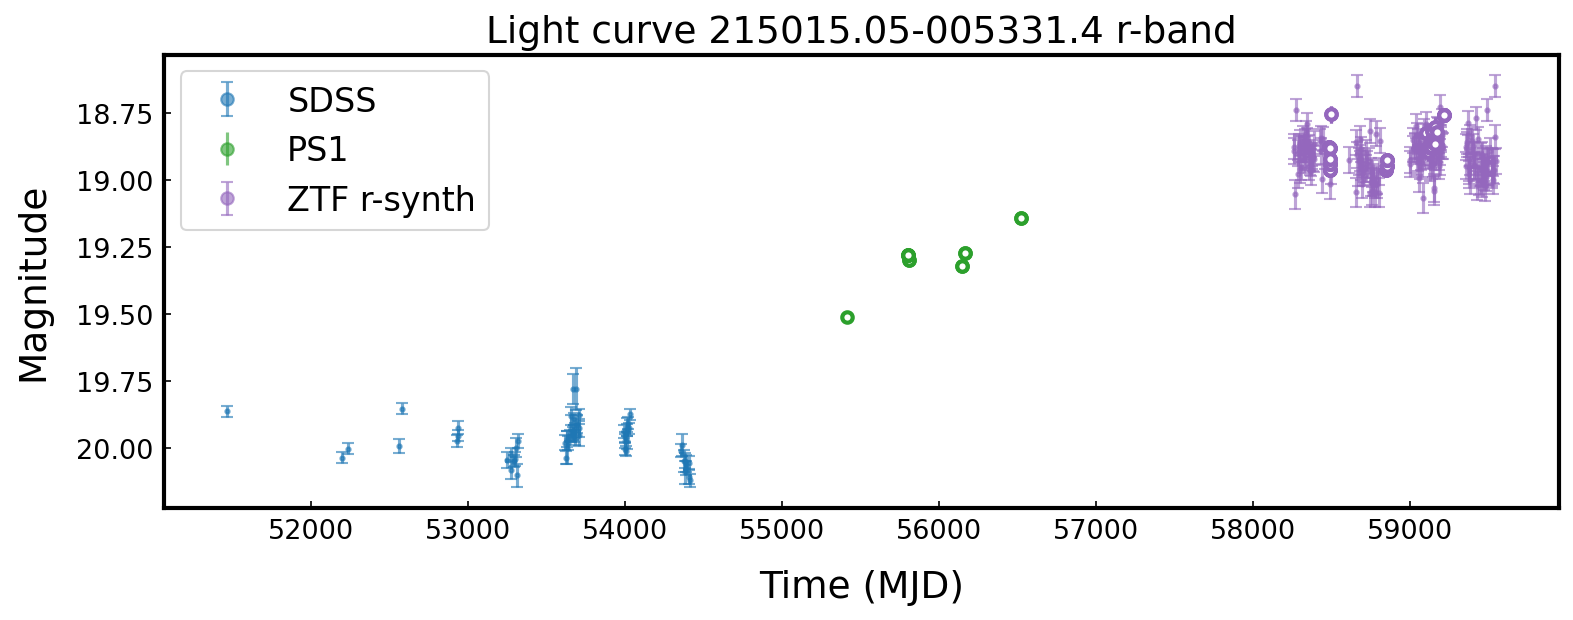

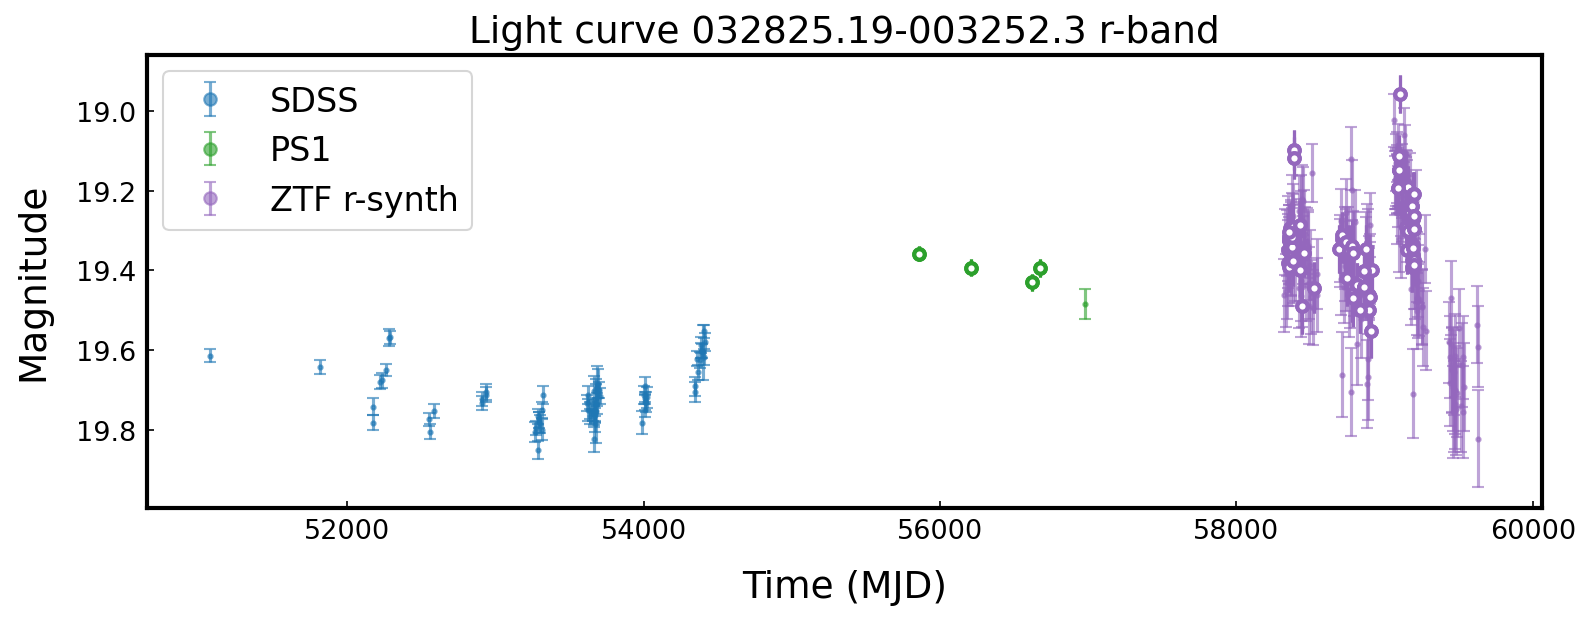

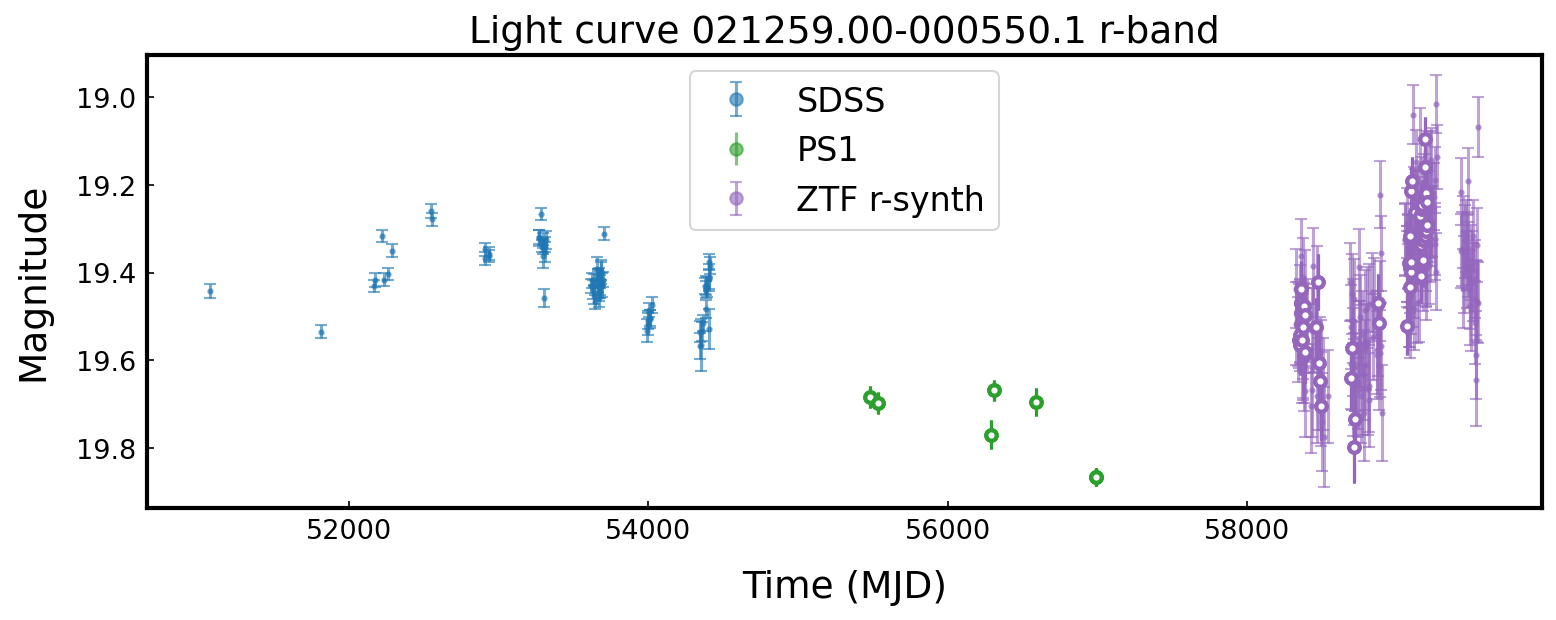

In [10]:
for N in range(12):
    data = get_data_to_dict(N)
    data = average_data(data, surveys_to_average=['ps1','ztf_synthetic'],
                        Nsigma = 5)
    plot_averaged_data(data, plot_flagged=False)

plot that information...

regular points with small dots, day-averaged points with open circles,  flagged points with larger circles of a given color




ps1
Unique days:7 total number of observations: 14

ztf_synthetic
Unique days:146 total number of observations: 182


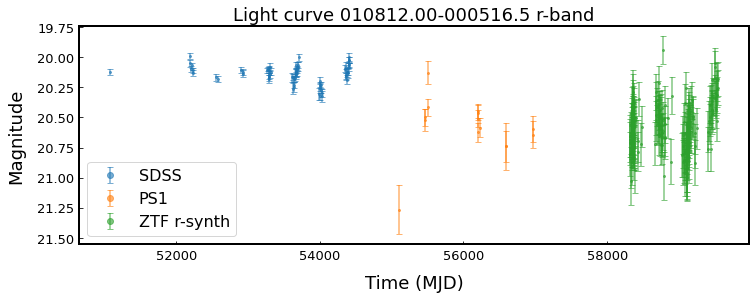

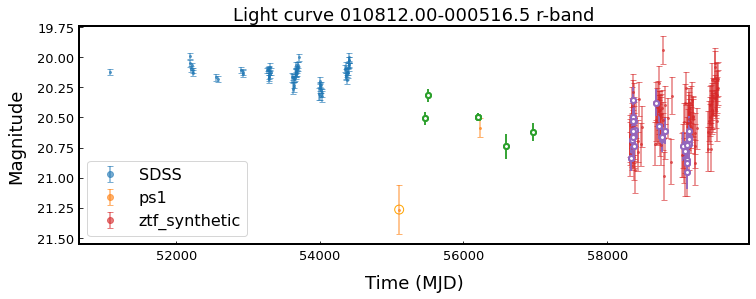

In [9]:
#plot original data
data_r_band = get_data_to_dict(N=1)
plot_combined_data(data_r_band) 

# perform day-averaging  and plot 
data_r_band = average_data(data_r_band)
plot_averaged_data(data_r_band)



ps1
Unique days:10 total number of observations: 20

ztf_synthetic
Unique days:203 total number of observations: 241

ps1
Unique days:7 total number of observations: 14

ztf_synthetic
Unique days:146 total number of observations: 182

ps1
Unique days:9 total number of observations: 20

ztf_synthetic
Unique days:171 total number of observations: 191

ps1
Unique days:12 total number of observations: 30

ztf_synthetic
Unique days:177 total number of observations: 267

ps1
Unique days:6 total number of observations: 14

ztf_synthetic
Unique days:165 total number of observations: 191

ps1
Unique days:7 total number of observations: 14

ztf_synthetic
Unique days:185 total number of observations: 237

ps1
Unique days:7 total number of observations: 13

ztf_synthetic
Unique days:24 total number of observations: 38

ps1
Unique days:10 total number of observations: 19

ztf_synthetic
Unique days:211 total number of observations: 247

ps1
Unique days:6 total number of observations: 13

ztf_synthe

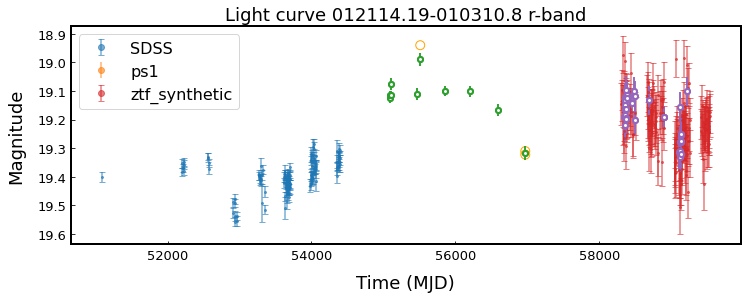

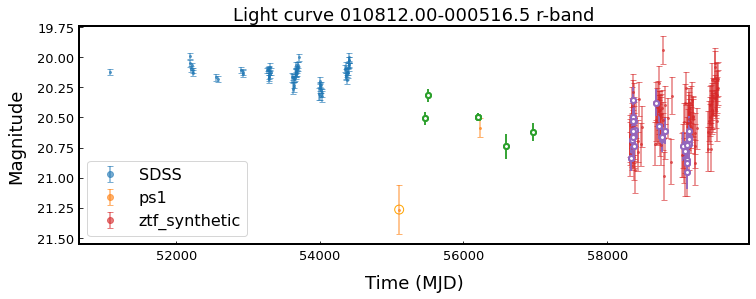

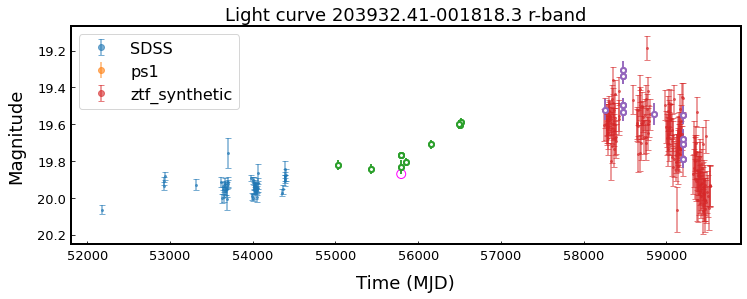

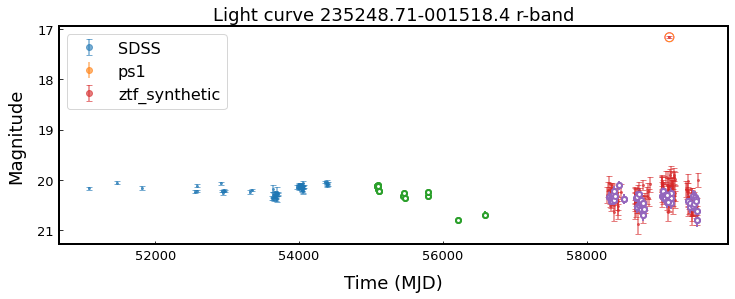

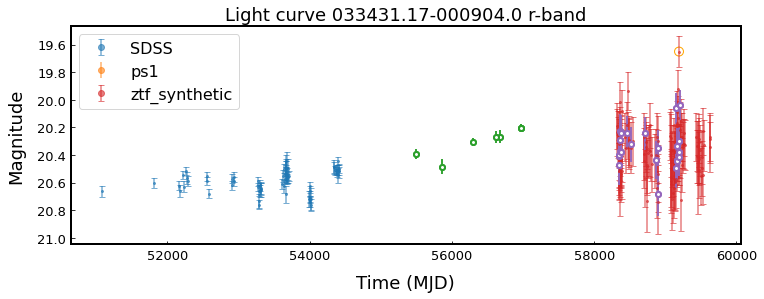

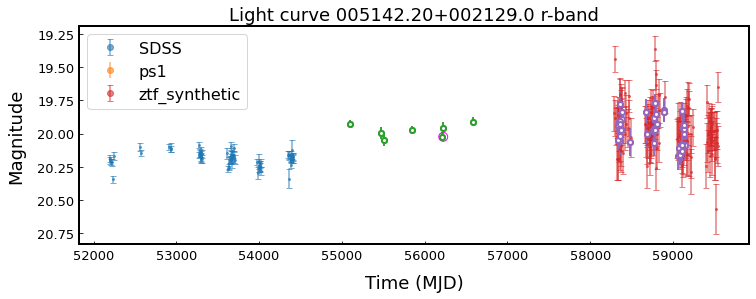

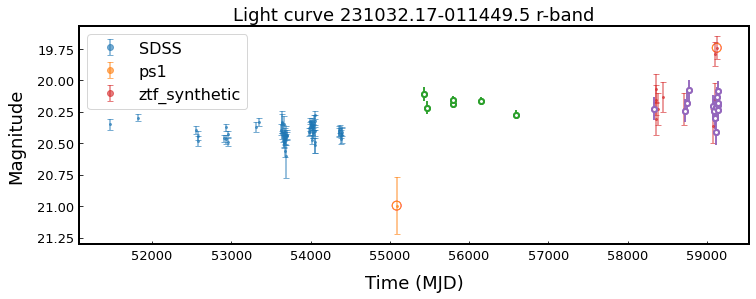

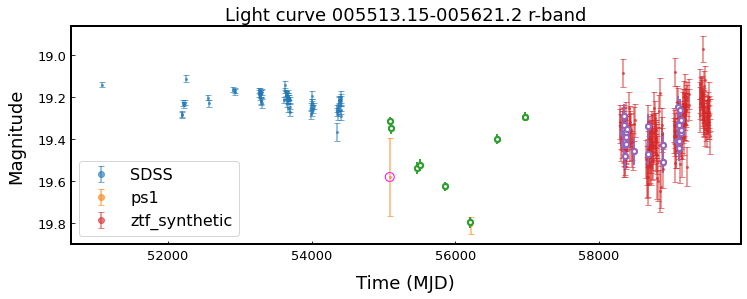

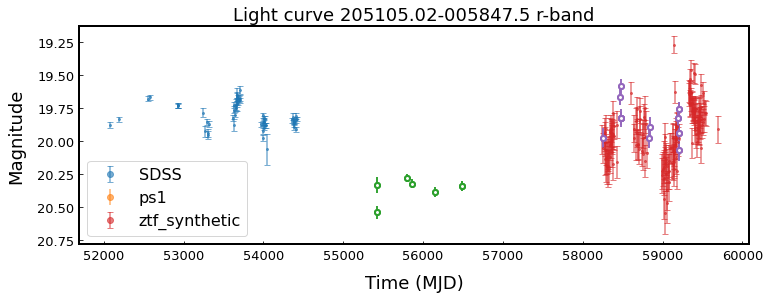

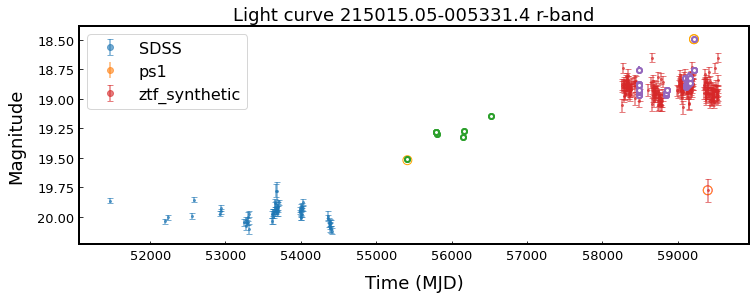

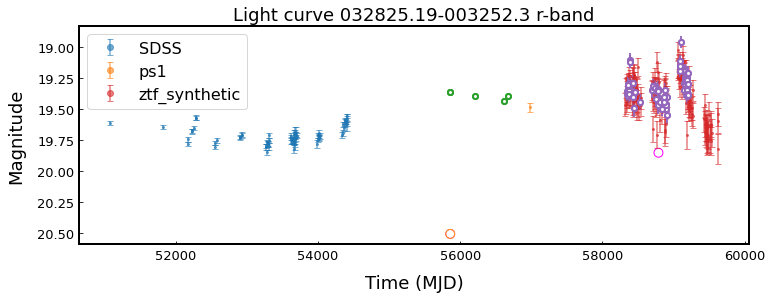

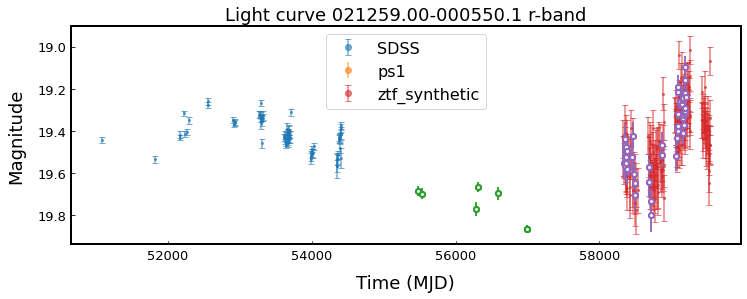

In [10]:
for N in range(12):
    data_r_band = get_data_to_dict(N)
    data_r_band = average_data(data_r_band)
    plot_averaged_data(data_r_band)


Make sure that :
* we're not plotting the averaged points
* we remove the flagged points 
* we have legend that explains all points / figure caption that explains all 

Plot the SDSS, PS1, ZTFr-to-SDSS-r  combined light curves : 

In [18]:
count_ztf_r_band()

There are 12 light curves with ZTF r-band data


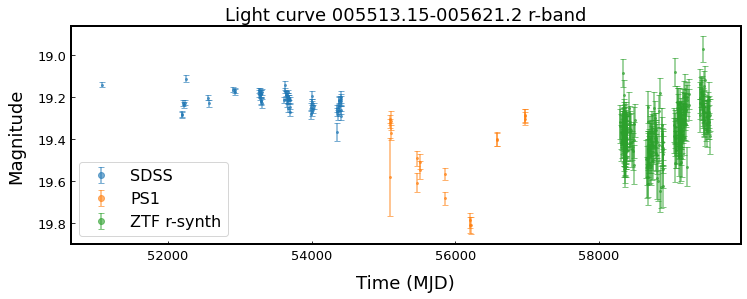

In [28]:
data_r_band = get_data_to_dict(N=7)
plot_combined_data(data_r_band) 

In [58]:
data_r_band.keys()

dict_keys(['ZTF_filename', 'SDSS_JID', 'SDSS_dbID', 'ztf_original', 'ztf_synthetic', 'sdss', 'ps1'])

That way we can also plot the original ZTF data to illustrate the effect of applying photometric offsets:

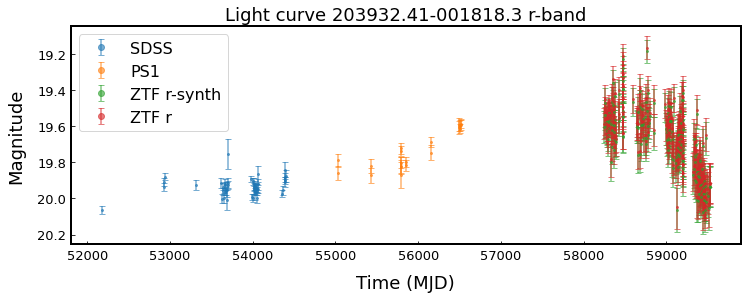

In [62]:
plot_combined_data(data_r_band, surveys=['sdss','ps1', 'ztf_synthetic',
                                        'ztf_original'],
                  labels=['SDSS','PS1', 'ZTF r-synth',
                         'ZTF r'],
                  ) 

In [43]:
count_ztf_r_band()

There are 12 light curves with ZTF r-band data


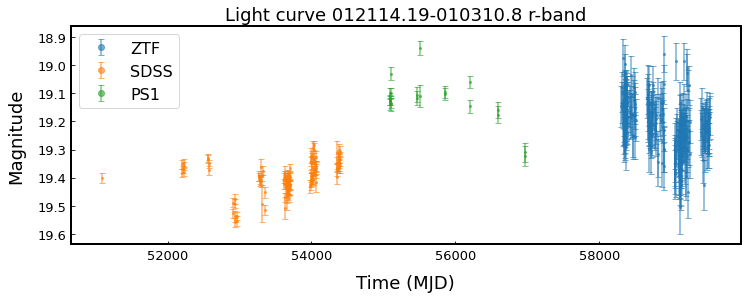

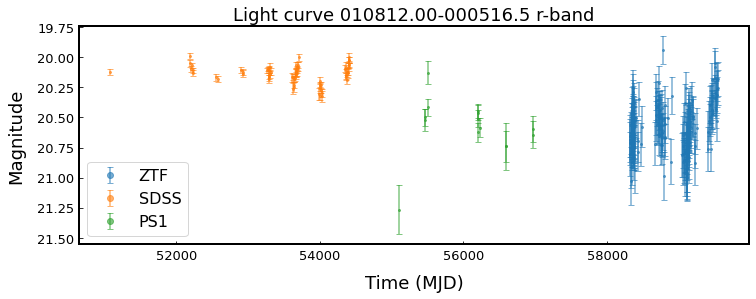

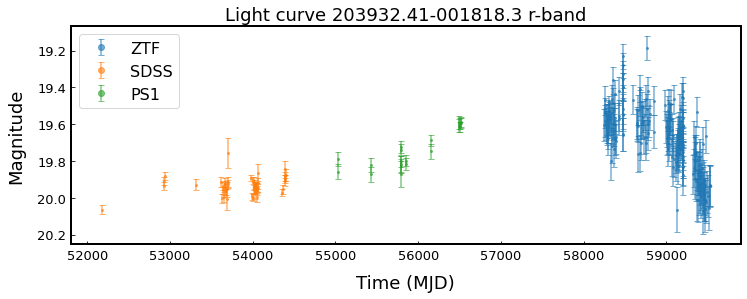

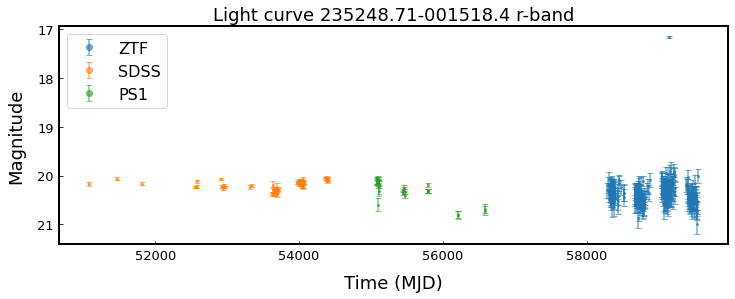

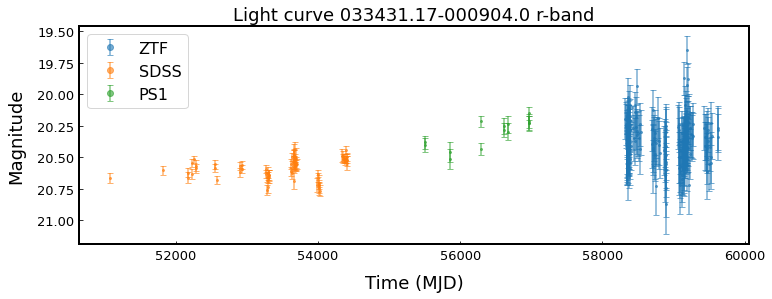

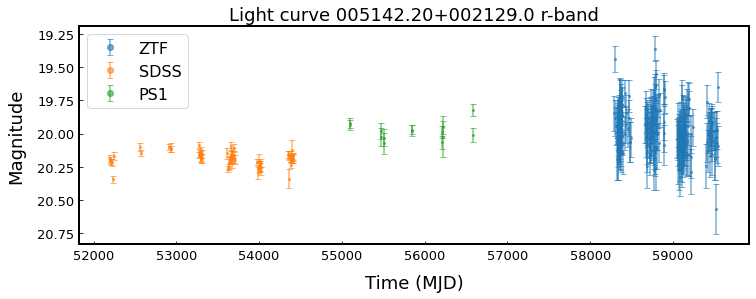

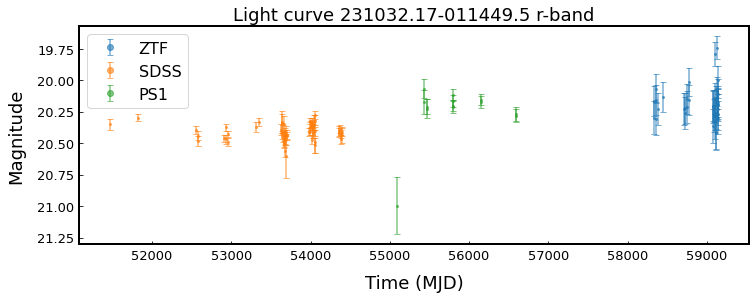

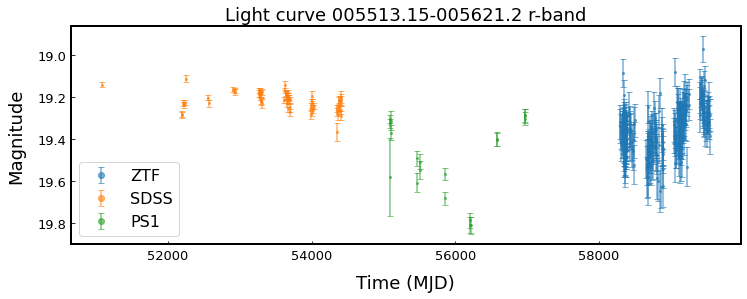

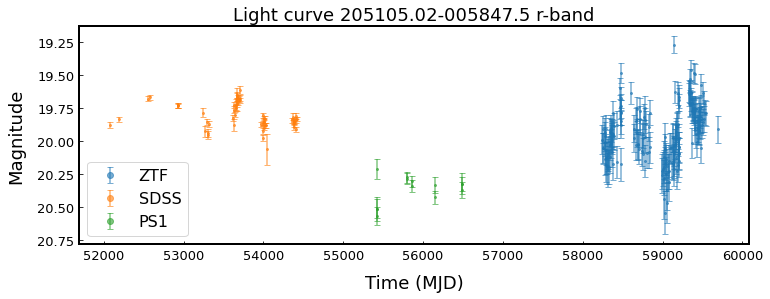

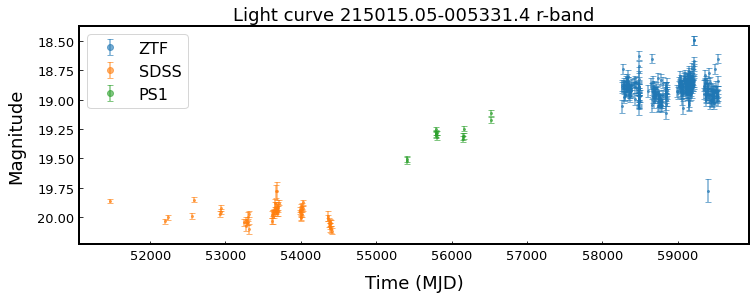

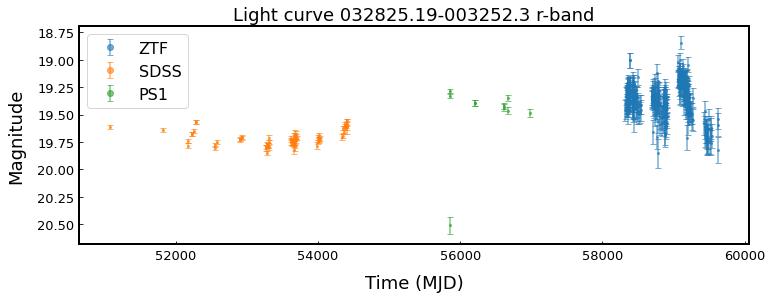

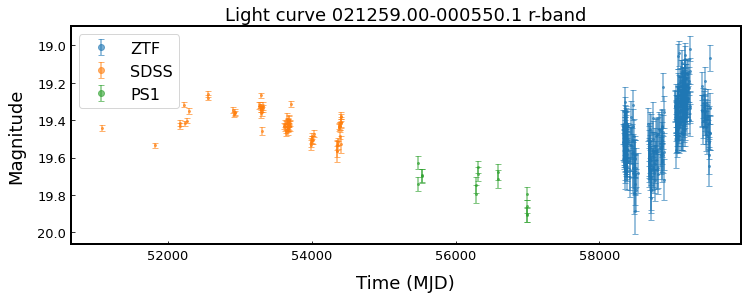

In [44]:
for N in range(12):
    data_r_band, sdss_jid, sdss_dbid  = get_data_to_dict(N)
    plot_combined_data(data_r_band, sdss_jid) 

That's interesting ! The only downside is that the ZTF data are very noisy. Thus consider binning them at least in day-wide bins, just like the PS1 data were binned in the paper. 

In [23]:
import os
from astropy.table import Table
path = os.getcwd()
file_path = os.path.join(path, "DB_QSO_S82.dat.gz")
# we know the column meaning from 
# https://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_DB.html
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']
SDSS_DB_QSO = Table.read(file_path, format='ascii', names = colnames)

mask = SDSS_DB_QSO['dbID'] == sdss_dbid
gi = SDSS_DB_QSO[mask]['g'][0]-SDSS_DB_QSO[mask]['i'][0]
r_SDSS_synth = r_ZTF  + 0.01  + 0.04  * gi

dbID,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1327,0.28137,0.686984,49,-24.917,-25.288,1.3988,8.817,46.071,20.213,20.105,19.815,19.666,19.749,0.139
1540,2.607954,0.913245,370,-27.263,-27.856,2.8473,0.0,0.0,21.346,19.15,19.093,18.944,18.758,0.122
1580,1.669492,0.643952,229,-24.427,-24.898,1.3383,8.666,45.862,20.732,20.572,20.13,20.079,20.231,0.207
2113,4.850273,-0.276395,699,-25.251,-25.695,1.769,0.0,0.0,19.956,20.066,20.152,19.886,19.618,0.147
2306,4.026021,0.478127,578,-24.999,-25.581,1.8725,0.0,0.0,20.772,20.708,20.599,20.262,20.201,0.128
2401,1.725449,-0.259281,237,-27.19,-27.684,1.7252,9.591,46.989,18.632,18.384,18.199,17.898,17.812,0.17
2670,0.068467,-0.309283,13,-25.151,-25.495,0.7026,8.664,46.241,18.782,18.129,17.907,17.788,17.698,0.175
2764,0.537709,0.098021,83,-24.691,-25.56,2.1463,0.0,0.0,21.078,21.146,21.176,20.893,20.682,0.153
2860,3.926662,0.263132,564,-25.568,-26.598,2.4301,9.21,46.597,21.055,20.284,20.249,20.287,19.928,0.126


In [19]:
arr = function()

In [21]:
a,b,c = arr

In [7]:
colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
            'f_Edd','Delta(mag)',
            'Delta(sigma_G)', 'MedianPS1']
clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                   names=colnames)
clqso

dbID,SDSSJID,ra,dec,Redshift,log10_Lbol,log10_MBH,f_Edd,Delta(mag),Delta(sigma_G),MedianPS1
str9,str18,float64,float64,float64,float64,str4,str5,float64,float64,float64
123909,001626.54+003632.4,4.111,0.609,3.24,46.57,9.47,-1.0,-0.29,-0.054,20.48
8442,001731.70+004910.1,4.382,0.819,2.43,46.61,9.09,-0.58,-0.36,-0.107,20.36
4069419,003359.39+000230.0,8.497,0.042,1.64,45.95,9.05,-1.21,0.22,0.017,20.2
221006,005142.20+002129.0,12.926,0.358,1.55,45.95,8.24,-0.39,0.21,-0.01,19.97
257776,005513.15-005621.2,13.805,-0.939,3.61,47.13,9.58,-0.54,-0.32,-0.242,19.53
612585^b,010812.00-000516.5,17.05,-0.088,1.0,45.52,9.06,-1.64,-0.37,0.006,20.5
1003694^c,012114.19-010310.8,20.309,-1.053,1.89,46.59,8.83,-0.34,0.28,0.032,19.11
1299803^c,014303.23-004354.0,25.763,-0.732,0.53,45.78,8.68,-1.0,-0.18,-0.008,18.56
1644710,021259.00-000550.1,33.246,-0.097,0.81,45.67,8.38,-0.81,-0.28,0.022,19.7
